## -------------------------- MAIN FLOW - Exploratory Data Analysis --------------------------------------------------------------------

In [1]:
import tensorflow
tensorflow.__version__
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 4.4 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=d6a168080175da3ed778c04e6672b714143ed6dab373620595e51977c138f891
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [4]:
!pip install unidecode

     |████████████████████████████████| 235 kB 4.2 MB/s 


In [5]:
import pandas as pd
import unidecode 
import re 
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#df = pd.read_excel("/content/input_data.xlsx")
df = pd.read_excel("input-data.xlsx")

### EDA

##### Displaying the head of the data

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

#### Displaying the number of rows in dataset + explore dataset

In [ ]:
print(df.shape[0])

8500


In [ ]:
df.describe(include='object')

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

* Password reset problem is the most frequent issue
* One caller has reported approx 10% of Total incidents reported
* The highest incidents assigned to GRP_0 (close to 50%)

##### Finding any nulls in dataset

In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

##### Checking the datatypes of each column

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB
None


In [ ]:
# Let's look at the rows with null values
df[pd.isnull(df).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

#### LEVEL 1 DATA CLEANING for WORDCLOUDS

In [ ]:
def remove_newlines_tabs(text):
    """
    This function will remove all the occurrences of newlines, tabs, and combinations like: \\n, \\.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of newlines, tabs, \\n, \\ characters.
        
    Example:
    Input : This is her \\ first day at this place.\n Please,\t Be nice to her.\\n
    Output : This is her first day at this place. Please, Be nice to her. 
    
    """
   
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text
def strip_html_tags(text):
    """ 
    This function will remove all the occurrences of html tags from the text.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of html tags.
        
    Example:
    Input : This is a nice place to live. <IMG>
    Output : This is a nice place to live.  
    """
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_links(text):
    """
    This function will remove all the occurrences of links.
    
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after removal of all types of links.
        
    Example:
    Input : To know more about this website: google.com  visit: https://google.com//search
    Output : To know more about this website: visit:     
    
    """
    
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

def remove_whitespace(text):
    """ This function will remove 
        extra whitespaces from the text
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" after extra whitespaces removed .
        
    Example:
    Input : How   are   you   doing   ?
    Output : How are you doing ?     
        
    """
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text
# Code for accented characters removal
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
       
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" with removed accented characters.
        
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
        
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

# The code for removing special characters
def removing_special_characters(text):
    """Removing all the special characters except the one that is passed within 
       the regex to match, as they have imp meaning in the text provided.
   
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text with removed special characters that don't require.
        
    Example: 
    Input : Hello, K-a-j-a-l. Thi*s is $100.05 : the payment that you will recieve! (Is this okay?) 
    Output :  Hello, Kajal. This is $100.05 : the payment that you will recieve! Is this okay?
    
   """
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text

# Code for removing repeated characters and punctuations

def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [ ]:
df['Description_P']=df['Description'].map(lambda text:reducing_incorrect_character_repeatation(removing_special_characters
                                                     (accented_characters_removal
                                                      (remove_whitespace(
                                                          remove_links(strip_html_tags(remove_newlines_tabs(text.replace('x000D','')))))))),na_action='ignore')
df['Description_P']=df['Description_P'].map(lambda text:re.sub(r"[^a-zA-Z:$-,%.?!+]+", ' ', text),na_action='ignore')

df['S_Description']=df['Short description'].map(lambda text:reducing_incorrect_character_repeatation(removing_special_characters
                                                     (accented_characters_removal
                                                      (remove_whitespace(
                                                          remove_links(strip_html_tags(text)))))),na_action='ignore')
df['S_Description']=df['S_Description'].map(lambda text:re.sub(r"[^a-zA-Z:$-,%.?!+]+", ' ', text),na_action='ignore')

df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  
0                    login issue  
1                        outlook  
2             cant log in to vpn  
3  unable to access hr tool page  
4                   skype error

In [ ]:
# Let's look at the rows with null values closely to impute 
pd.set_option('display.max_colwidth', 200)
df[pd.isnull(df).any(axis=1)]


Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                                                                                                                                                                                  Description  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezuibdt@gmail.com_x000D_\n_x000D_\nhi,_x000D_\n_x000D_\n_x000D_\n_x000D_\nlink is not working. kindly resolve yhe issue on urgent basis._x000D_\n_x000D_\...   
3383                                                                            _x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the portal._x000D_\n-issue resolved.   
3906           -user unable  tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.   
3910           -user unable  tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.   
3915           -user unable  tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.   
3921           -user unable  tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at...   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxkcbgj@gmail.com_x000D_\n_x000D_\ngood morning,_x000D_\n_x000D_\nwhen  trying to log on to erp i get this error below._x000D_\nplease help  urgently as ...   
4395                                                                                                                                                                                                      NaN   

                 Caller Assignment group  \
2604  ohdrnswl rezuibdt           GRP_34   
3383  qftpazns fxpnytmk            GRP_0   
3906  awpcmsey ctdiuqwe            GRP_0   
3910  rhwsmefo tvphyura            GRP_0   
3915  hxripljo efzounig            GRP_0   
3921  cziadygo veiosxby            GRP_0   
3924  wvqgbdhm fwchqjor            GRP_0   
4341  eqmuniov ehxkcbgj            GRP_0   
4395  viyglzfo ajtfzpkb            GRP_0   

                                                                                                                                                                                                Description_P  \
2604                                                                                      received from: ohdrnswl.rezuibdt gmail.com hi, link is not working. kindly resolve yhe issue on urgent basis. best    
3383                                                                                                        connected to the user system using teamviewer. help the user login to the portal. issue resolved.   
3906                                        user unable tologin to vpn. connected to the user system using teamviewer. help the user login to the company vpn using the vpn company vpn link. issue resolved.   
3910                                        user unable tologin to vpn. connected to the user system using teamviewer. help the user login to the company vpn using the vpn company vpn link. issue resolved.   
3915                                        user unable tologin to vpn. connected to the user s

In [ ]:
#five missing short description belong to VPN logiin issue
pd.set_option('display.max_colwidth', 50)
missingindex=[3906,3910,3915,3921,3924]
for index in missingindex:
    df.loc[index,'S_Description'] = 'vpn login issue'
df[pd.isnull(df).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group                                      Description_P  \
2604           GRP_34   received from: ohdrnswl.rezuibdt gmail.com hi...   
3383            GRP_0   connected to the user system using teamviewer...   
3906            GRP_0   user unable tologin to vpn. connected to the ...   
3910            GRP_0   user unable tologin to vpn. connected to the ...   
3915            GRP_0   user unable tologin to vpn. connected to the ...   
3921            GRP_0   user unable tologin to vpn. connected to the ...   
3924            GRP_0  name:wvqgbdhm fwchqjor language: browser:micro...   
4341            GRP_0   received from: eqmuniov.ehxkcbgj gmail.com go...   
4395            GRP_0                                                NaN   

                 S_Description  
2604                       NaN  
3383                       NaN  
3906           vpn login issue  
3910           vpn login issue  
3915           vpn login issue  
3921           vpn login issue  
3924           vpn login issue  
4341                       NaN  
4395  i am locked out of skype

In [ ]:
## Class Distribution
df_labels = df['Assignment group'].value_counts().reset_index()
df_labels['percentage'] = ((df_labels['Assignment group']/df_labels['Assignment group'].sum())*100).round().astype(int)
df_labels.head()

index  Assignment group  percentage
0   GRP_0              3976          47
1   GRP_8               661           8
2  GRP_24               289           3
3  GRP_12               257           3
4   GRP_9               252           3

##### ~47% of the data is occupied by GRP_0 followed by GRP_8, GRP_24, GRP_12 & GRP_9 being the top 5 groups

In [ ]:
df_labels.rename(columns = {'index': 'Assignment group', 'Assignment group':'Ticket_Count'}, inplace = True)
df_labels.head(20)

Assignment group  Ticket_Count  percentage
0             GRP_0          3976          47
1             GRP_8           661           8
2            GRP_24           289           3
3            GRP_12           257           3
4             GRP_9           252           3
5             GRP_2           241           3
6            GRP_19           215           3
7             GRP_3           200           2
8             GRP_6           184           2
9            GRP_13           145           2
10           GRP_10           140           2
11            GRP_5           129           2
12           GRP_14           118           1
13           GRP_25           116           1
14           GRP_33           107           1
15            GRP_4           100           1
16           GRP_29            97           1
17           GRP_18            88           1
18           GRP_16            85           1
19           GRP_17            81           1

## ---------------------------------------- MAIN FLOW - Visualization Reports ---------------------------------------------------------

##### BAR CHART

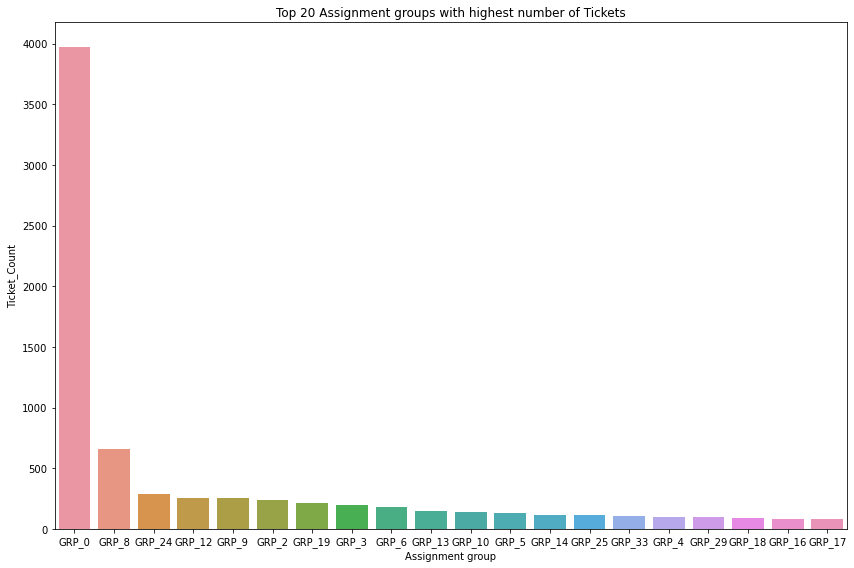

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.title('Top 20 Assignment groups with highest number of Tickets')
sns.barplot(x=df_labels['Assignment group'],y=df_labels['Ticket_Count'],order=df_labels.sort_values('Ticket_Count',ascending=False)['Assignment group'].head(20))
plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

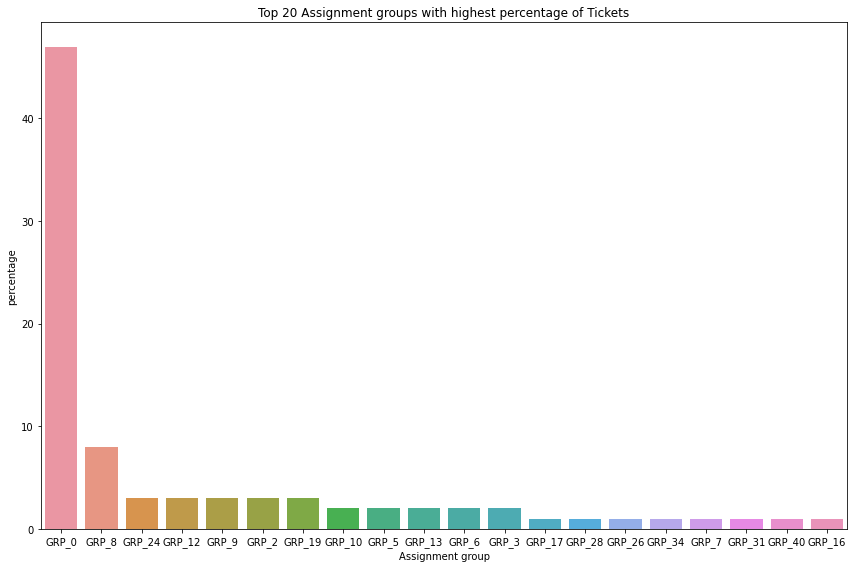

In [ ]:
## Assignment Group by Percentage of Tickets


plt.figure(figsize=(12,6))

plt.figure(figsize=(12,8))
plt.title('Top 20 Assignment groups with highest percentage of Tickets')
sns.barplot(x=df_labels['Assignment group'],y=df_labels['percentage'],order=df_labels.sort_values('percentage',ascending=False)['Assignment group'].head(20))
plt.tight_layout()


##### PIE CHART

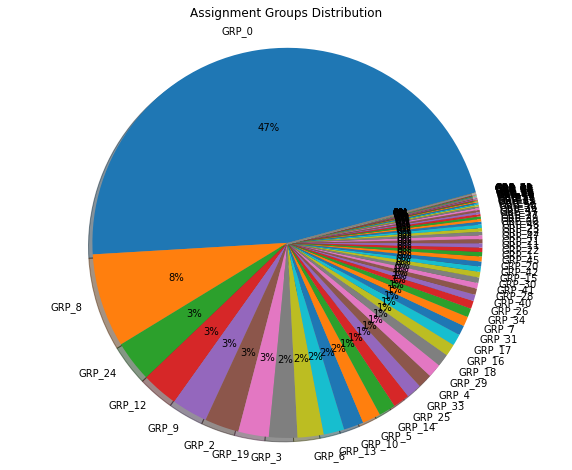

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(df_labels['Ticket_Count'], labels=df_labels['Assignment group'], autopct='%1.0f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

#### **EDA Detailed Analysis Points:**
The class distribution shows severe imbalance. This leads us to believe that maybe <b>Group 0</b> is the <b>L1</b> or "Default" group for landing tickets, followed by <b>Group 8</b> being the L2. <b>Rest</b> all the groups are <b>L3</b>.

But to confirm this assumption, we need to delve into the contents of this group and study the nature of the tickets landed in these groups, ie Group 0 and 8, which will be our next section of analysis.

<b>Definition of L1, L2 and L3</b>:

<b>L1 – First Line Support: Telephone helpdesk or answer center support</b>

L1 support includes interacting with customers, understand their issue and create tickets against it. The tickets are then routed to the relevant L2 support groups like Integration support, Server & Storage support, etc. L1 support Engineers have basic knowledge of product/service and skill to troubleshoot basic & frequent occurring issues. Automated tickets like password resets, account unlocks etc. also land in this group.

<b>L2 – Second Line Support</b>

L2 support manages the tickets which are routed to them by L1( L2 support also can create tickets against any issue noticed by them). They have more knowledge, more experience in solving related complex issues and can guide/help L1 support folks job in troubleshooting. If the solution not provided at this level then escalate to the L3.

<b>L3 – Third Line Support</b>

L3 is generally the last line of support (but not always) and usually comprises of development teams which address the technical issues. They are experts in their domain and handle the most difficult problems. Involves code changes to application. Generally handles new/unseen issues.

In [ ]:
### Lets analyse the contents of each group
df_incidents = df.drop('Caller',axis=1)

In [ ]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

#### **CONCATENATING DESCRIPTION COLUMNS for WORDCLOUDS**

In [ ]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [ ]:
### Wordcloud function
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

In [ ]:
#!pip install wordcloud

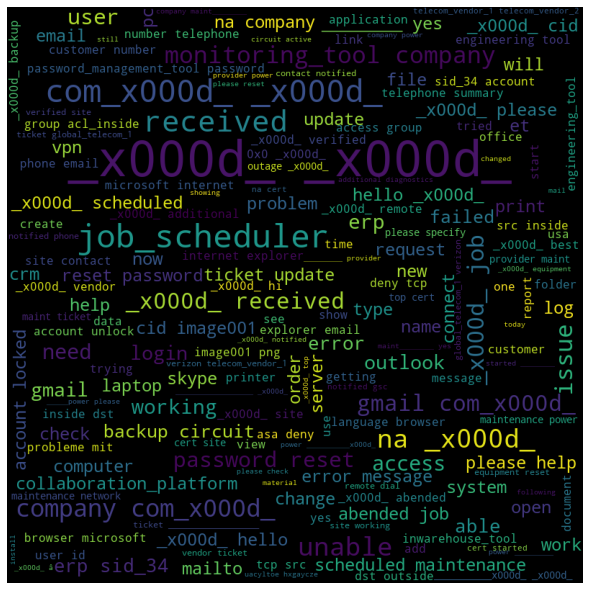

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

wordcloud = f_word_cloud(df_incidents.New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 16), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##### <b>Job_Scheduler</b> is the most dominant term of the total incidents reported in the dataset.

#### **GROUPWISE Frequent Words**

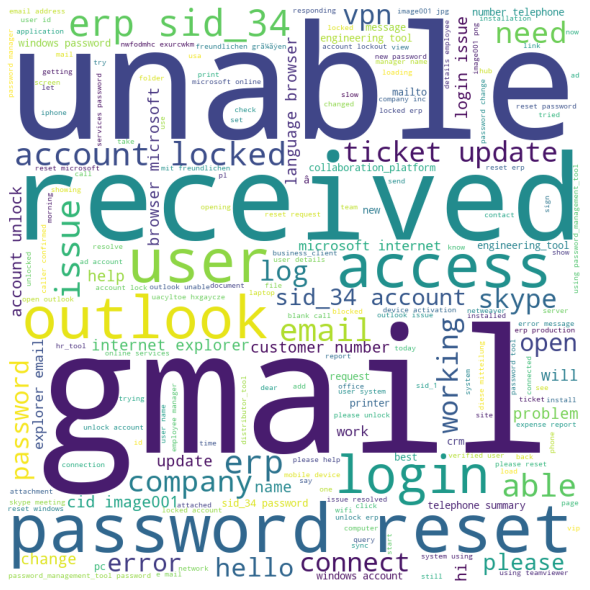

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_0'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 0</b> does, infact, look like a L1 group, where tickets are registered generally, automated tickets like password resets etc. land.

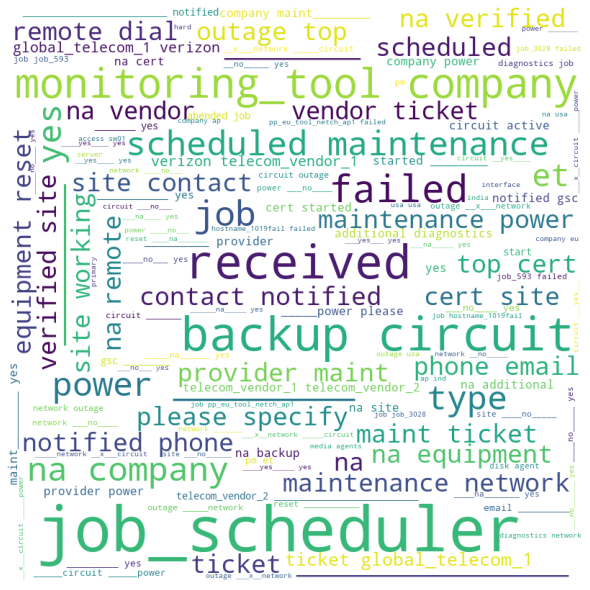

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_8'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 8</b> looks to be a L2 group mainly dealing with Outages, Network Support and Maintenance. Job_Schedulers are present as well.

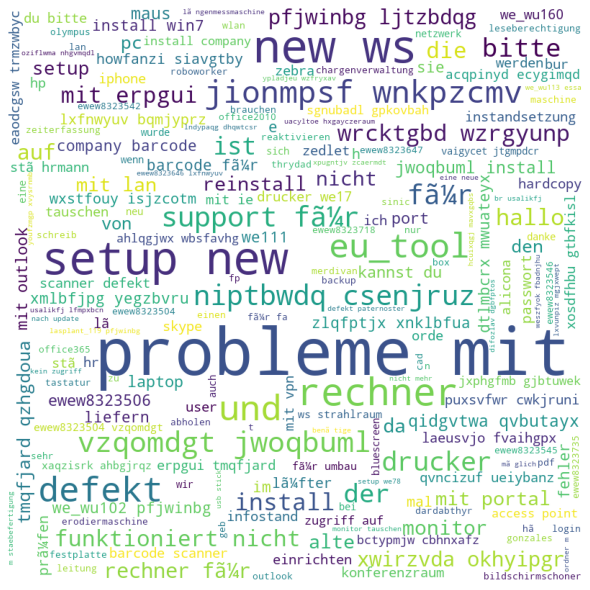

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_24'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 24</b> very clearly tells us is the group specific to German. Could be considered the <b>L1</b> group for German.

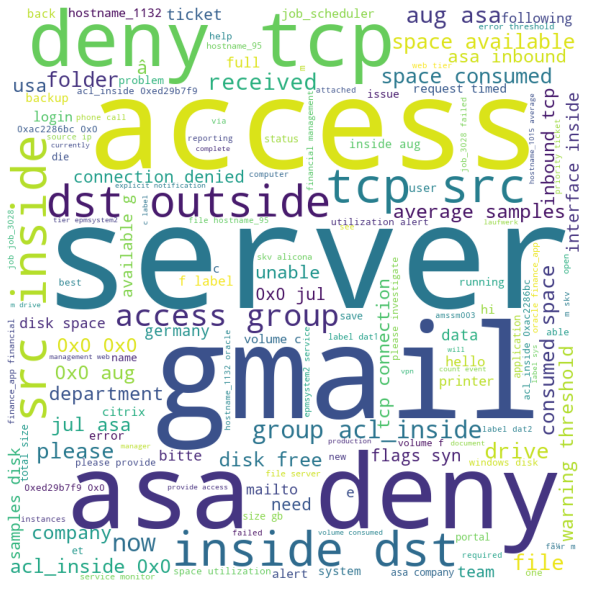

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_12'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 12</b> looks to be mainly related to <b>Access</b>

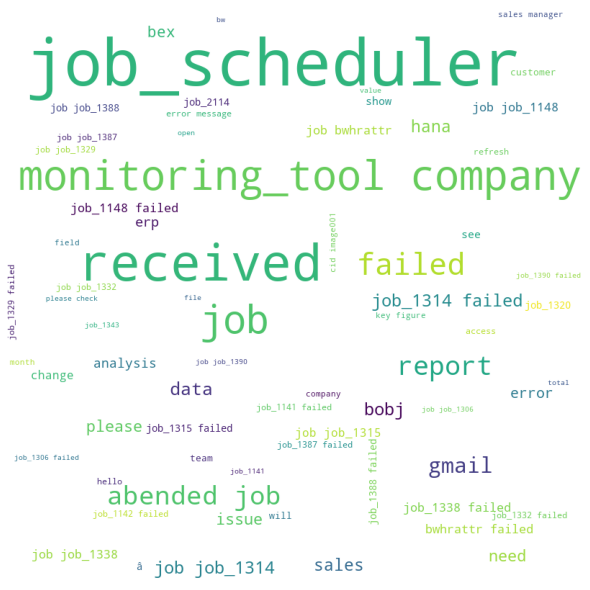

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_9'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 9</b> looks to be a group for landing automated job_scheduler related tickets.

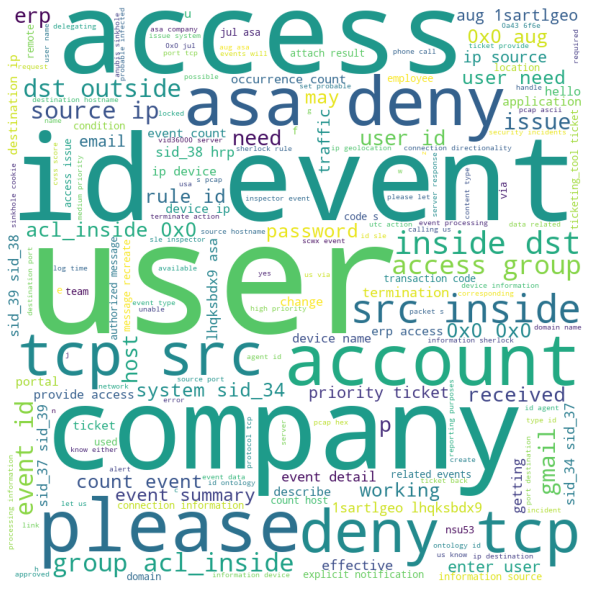

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_2'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Group 2** looks to be again related to **Access**

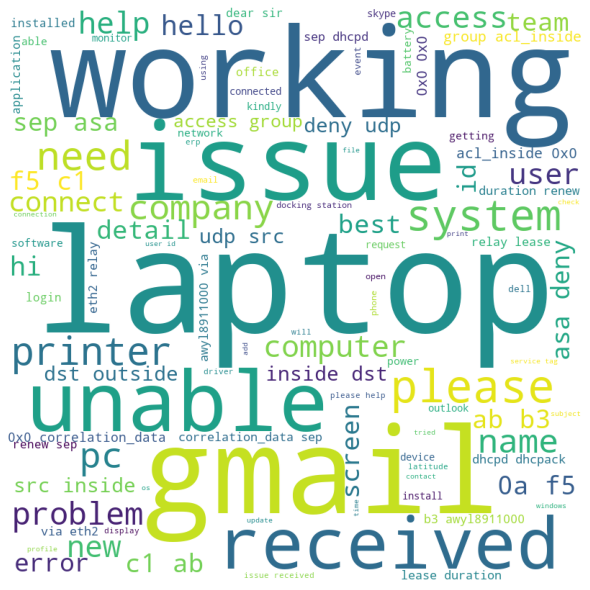

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_19'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 19</b> looks to be one of the asset related groups, mainly handling laptops.

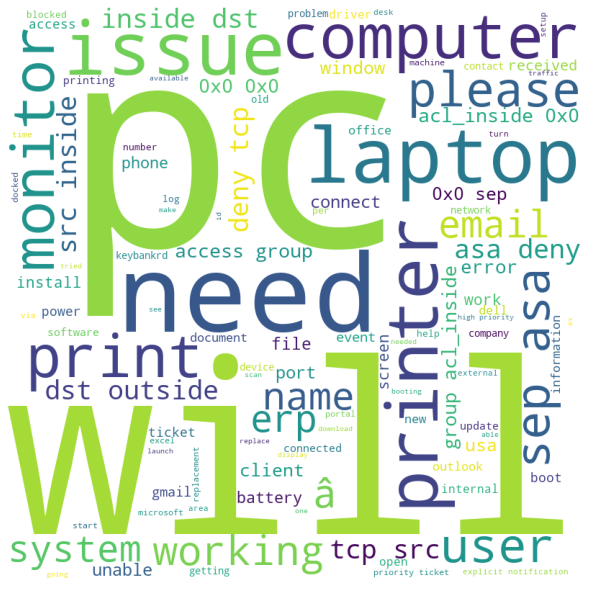

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_3'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Similarly, <b>Group 3</b> looks to be another asset related group, PCs, laptops, printers etc.

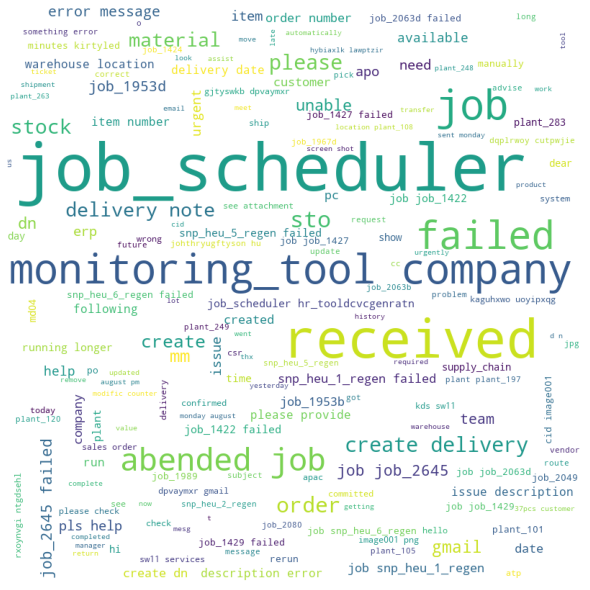

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_6'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<b>Group 6</b> looks to be another group for landing automated job_scheduler related tickets, like <b>Group 9</b>.

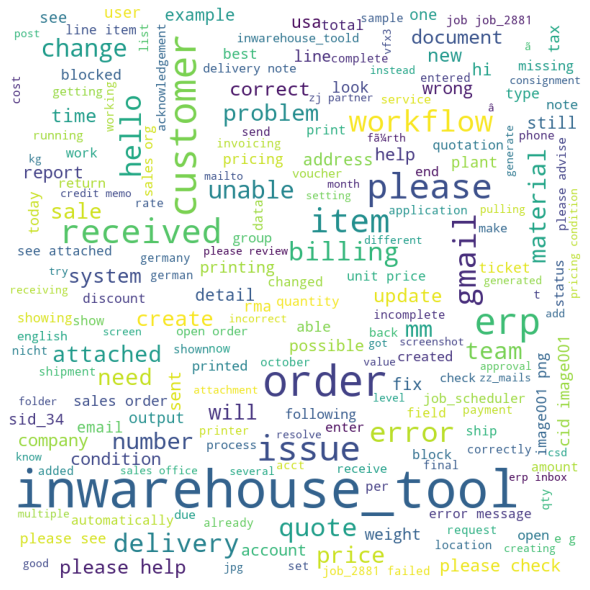

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_13'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Group 13** looks to be related to **inwarehouse_tool**

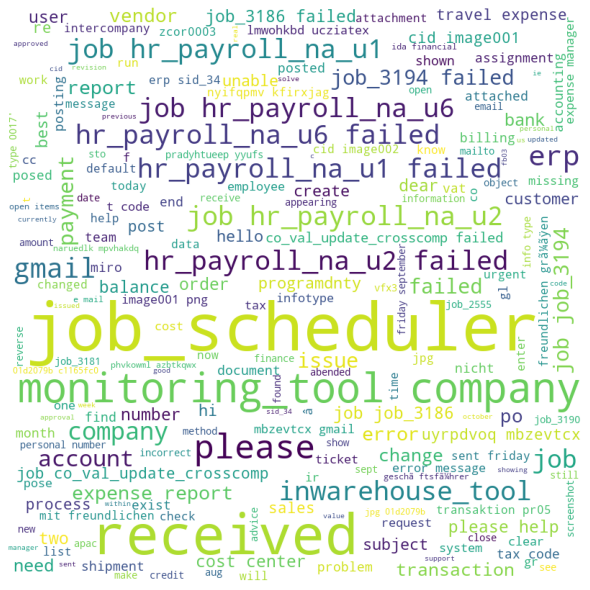

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_10'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Group 10** Looks to be automated group for **payroll related jobs**.

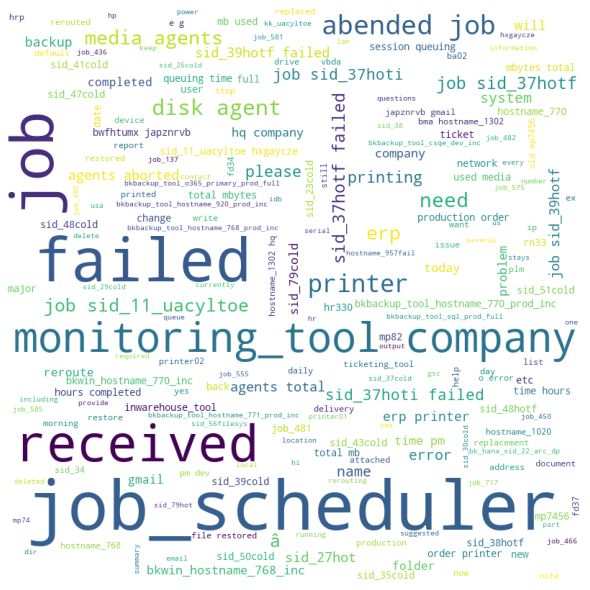

In [ ]:
wordcloud = f_word_cloud(df_incidents[df_incidents['Assignment group']=='GRP_5'].New_Description)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Group 5** looks to be another group related to automated Job_Scheduler dumps, similar to **Group 6 & 9**

##### **Summary of text in top 12 groups**

Group 0,24 - L1

Group 8 - Network Related Incidents, Job Scheduler

Group 12,2 - Access Related

Group 10 - Payroll related Job Scheduler

Group 5,6,9 - Job Scheduler in general (Might as well make sense to combine these)

Group 19 - Asset related (Laptop)

Group 3 - Asset related (PC, Laptop, Printer)(Might as well make sense to combine these with group 19)

Group 13 - Inwarehouse tool

**So, as we can see there is lot of similarity in text in the groups and they're not strictly defined. This will make for harder prediction, unless we combine groups.**

## ----------------------------------  MAIN FLOW - Language Translation --------------------------------------------------------------------

In [ ]:
# NULL replacement with empty string as we will combine Description and Short Description and it 
# doesn't make sense to just replace the nulls with vpn or skype and cause duplicates in text
df.fillna(str(), inplace=True)

In [ ]:
df[pd.isnull(df).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group, Description_P, S_Description]
Index: []

##### We can see there are 8 nulls in Short Description and 1 Null in Description column

In [ ]:
df.describe(include='object')

Short description Description             Caller Assignment group  \
count               8500        8500               8500             8500   
unique              7482        7818               2950               74   
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0   
freq                  38          56                810             3976   

                                            Description_P  \
count                                                8500   
unique                                               6836   
top     received from: monitoring tool company.com job...   
freq                                                  421   

                                   S_Description  
count                                       8500  
unique                                      6507  
top     job Job failed in job scheduler at: : :   
freq                                         430

In [ ]:
df.loc[(df['Assignment group'] == 'GRP_30')].head()

Short description  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼   
1805                                  wifi ä¸èƒ½åœ¨çº¿   

                                            Description             Caller  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...  bxfdkiol mdqlszvc   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³  cyjlqdwm kywiuosn   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°  omatlyrd bvraipdt   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼  spgdcvhb ocagnpmj   
1805                                  wifi ä¸èƒ½åœ¨çº¿  qnvkwalx dfjtxigl   

     Assignment group                                      Description_P  \
276            GRP_30  outlookae Pa degc(r)+ a,foldera a,oae a$?(c)a,...   
1178           GRP_30                      c ue aeoeoae !aeoe% aPSdegeY    
1271           GRP_30        fe a$?adega+oaeY co,a ae +a a,ae,.ae(tm)deg   
1452           GRP_30      eEURfa $?c c Ye? a,aZ e *a$?,c+edegC edegC i    
1805           GRP_30                                  wifi a,ef aoe co?   

                                          S_Description  
276   outlookae Pa degc(r)+ a,foldera a,oae a$?(c)a,...  
1178                      c ue aeoeoae !aeoe% aPSdegeY   
1271        fe a$?adega+oaeY co,a ae +a a,ae,.ae(tm)deg  
1452      eEURfa $?c c Ye? a,aZ e *a$?,c+edegC edegC i   
1805                                  wifi a,ef aoe co?

######  When we manually did a quick glance of all the groups. We found GRP_30 had had 39 rows. But, it seems to have some junk data.(”µè¯\x9dæœºæ²¡æœ‰å£°éŸ³)\n\n Let's try to convert some of these texts using decoders to convert to proper text

In [ ]:
text="è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼"
text.encode().decode('latin-1')

'Ã¨â\x82¬Æ\x92Ã¥â\x80¹Â¤Ã§Â³Â»Ã§Â»Å¸Ã¨Â¿â\x80ºÃ¤Â¸Â\x8dÃ¥Å½Â»Ã¨Â¯Â·Ã¥Â¤â\x80\x9eÃ§Â\x90â\x80\xa0Ã¨Â°Â¢Ã¨Â°Â¢Ã¯Â¼Â\x81'

##### As we can see it is able to decode the symbols to some other characters when we use 'latin-1' decoding and it may have got garbled when original text got encoded in one standard and decoded incorrectly in another standard.\n\nOn further analysis, we found these garbled texts are called mojibake and python library ftfy fixes this

In [ ]:
!pip install ftfy

In [ ]:
!pip install langdetect

In [ ]:
# Lets try to test if these texts are actually impacted by mojibake
import ftfy
from langdetect import detect

In [ ]:
print("garbled text :" + text)
print("fixed text:" + ftfy.fix_text(text))
print("detected lang:" + detect(ftfy.fix_text(text)))

garbled text :è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼
fixed text:考勤系统进不去请处理谢谢!
detected lang:zh-cn


##### Now, that we have identified it is indeed impacted by mojibake, let's apply it for the entire dataset

In [ ]:
#df_test = df.head()
# Clean the dataset from Mojibakes
df['S_Description'] = df['Short description'].map(lambda x: ftfy.fix_text(x))
df['L_Description'] = df['Description'].map(lambda x: ftfy.fix_text(x))

In [ ]:
def lang_det(message):
  try:
     return detect(message)
  except:
    return "no lang"

In [ ]:
df['Lang'] = df['L_Description'].map(lambda x: lang_det(x), na_action='ignore')

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                       L_Description Lang  
0  -verified user details.(employee# & manager na...   en  
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...   en  
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...   en  
3                      unable to access hr_tool page   en  
4                                       skype error    no

In [ ]:
df.loc[(df['Assignment group'] == 'GRP_30')].head()

Short description  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼   
1805                                  wifi ä¸èƒ½åœ¨çº¿   

                                            Description             Caller  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...  bxfdkiol mdqlszvc   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³  cyjlqdwm kywiuosn   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°  omatlyrd bvraipdt   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼  spgdcvhb ocagnpmj   
1805                                  wifi ä¸èƒ½åœ¨çº¿  qnvkwalx dfjtxigl   

     Assignment group                                      Description_P  \
276            GRP_30  outlookae Pa degc(r)+ a,foldera a,oae a$?(c)a,...   
1178           GRP_30                      c ue aeoeoae !aeoe% aPSdegeY    
1271           GRP_30        fe a$?adega+oaeY co,a ae +a a,ae,.ae(tm)deg   
1452           GRP_30      eEURfa $?c c Ye? a,aZ e *a$?,c+edegC edegC i    
1805           GRP_30                                  wifi a,ef aoe co?   

                                  S_Description  \
276   outlook收到箱中folder变为每天一个folder,office提示更新。   
1178                                    电话机没有声音   
1271                           fe10 复印出来纸张文字不清晰   
1452                              考勤系统进不去请处理谢谢!   
1805                                  wifi 不能在线   

                                  L_Description   Lang  
276   outlook收到箱中folder变为每天一个folder,office提示更新。     en  
1178                                    电话机没有声音  zh-cn  
1271                           fe10 复印出来纸张文字不清晰  zh-cn  
1452                              考勤系统进不去请处理谢谢!  zh-cn  
1805                                  wifi 不能在线     cy

In [ ]:
df['Lang'].unique()

array(['en', 'no', 'fr', 'it', 'es', 'af', 'sv', 'ca', 'nl', 'tl', 'ro',
       'id', 'fi', 'de', 'sl', 'cy', 'et', 'pt', 'sq', 'zh-cn', 'pl',
       'da', 'ko', 'hr', 'so', 'ja', 'tr', 'sw', 'vi', 'lt', 'no lang',
       'cs', 'lv', 'hu'], dtype=object)

In [ ]:
df.loc[(df['Lang'] =='sk') | (df['Lang'] =='ja')]

Short description  \
2108  i cannot extract finance_app data - pls resolv...   
5449                           company distributor_tool   

                                            Description             Caller  \
2108  \n\nreceived from: uagqromi.sqgtkmci@gmail.com...  uagqromi sqgtkmci   
5449  \r\n\r\nreceived from: pnabslgh.vatpgsxn@gmail...  pnabslgh vatpgsxn   

     Assignment group                                      Description_P  \
2108           GRP_55   received from: uagqromi.sqgtkmci gmail.com ci...   
5449            GRP_0   received from: pnabslgh.vatpgsxn gmail.com hi...   

                                          S_Description  \
2108  i cannot extract finance_app data - pls resolv...   
5449                           company distributor_tool   

                                          L_Description Lang  
2108  \n\nreceived from: uagqromi.sqgtkmci@gmail.com...   ja  
5449  \n\nreceived from: pnabslgh.vatpgsxn@gmail.com...   ja

In [ ]:
df.loc[(df['Lang'] =='tr') | (df['Lang'] =='lt')]

Short description  \
3874       i can't reiceve e-mail form my mobile phone.   
4091  reset passwords for hgyvopct dhckfmbq using pa...   
5781                                vip2: printer setup   
6286                                        bios update   

                                            Description             Caller  \
3874  could you reset my company mobile phone. detai...  wmrozfpt ltgcofqp   
4091                  è¯·å°†å¯†ç è®¾ç½®ä¸ºï¼šsdguo1609  hgyvopct dhckfmbq   
5781                                vip2: printer setup  usqrpicf dfmxaliz   
6286                                        bios update  jvshydix rzpmnylt   

     Assignment group                                      Description_P  \
3874            GRP_0  could you reset my company mobile phone. detai...   
4091           GRP_17                e *adeg+a +c e(r) c (r)a,oi ssdguo    
5781            GRP_0                                vip : printer setup   
6286            GRP_0                                        bios update   

                                          S_Description  \
3874       i can't reiceve e-mail form my mobile phone.   
4091  reset passwords for hgyvopct dhckfmbq using pa...   
5781                                vip2: printer setup   
6286                                        bios update   

                                          L_Description Lang  
3874  could you reset my company mobile phone. detai...   tr  
4091                                  请将密码设置为:sdguo1609   lt  
5781                                vip2: printer setup   lt  
6286                                        bios update   lt

##### As we can see landetect library is not good. It seems to incorrectly identify languages. It is not able to even classify english language correctly.\n\nI tried earlier and found that the language detector for TextBlob is also not working. This is because the URL in the translate.py is not correctly connecting to google translator

In [ ]:
!pip install deep_translator

In [ ]:
from deep_translator import GoogleTranslator, single_detection

In [ ]:
# The traffic is retricted beyond a number of requests and Google blocks it. Hence, it requires paid 
#subscription api_key='bda3b74198da1c0a669c5196b81ace79'
#single_detection('请将密码设置为', api_key='your_api')

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                       L_Description Lang  
0  -verified user details.(employee# & manager na...   en  
1  \n\nreceived from: hmjdrvpb.komuaywn@gmail.com...   en  
2  \n\nreceived from: eylqgodm.ybqkwiam@gmail.com...   en  
3                      unable to access hr_tool page   en  
4                                       skype error    no

In [ ]:
df[df['Assignment group']=='GRP_30']

Short description  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼   
1805                                  wifi ä¸èƒ½åœ¨çº¿   
1954                        ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ   
1955                     æœ‰ä¸€ä¸ªé“¾æŽ¥æ–‡ä»¶æ‰“ä¸å¼€   
2736                             vpnå®‰è£…-è½¬è´ºæ­£å¹³   
2980  hp2çƒ­åŽ‹ç‚‰æ•°æ®ä¼ è¾“å¡ï¼Œæ•°æ®æ›´æ–°ä¸å...   
3120               ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚   
3137                                 é‚®ç®±æ— æ³•å¯åŠ¨   
3300   outlookæ— æ³•ç™»é™† ,ä¸€ç›´æ˜¾ç¤ºæ­£åœ¨å¯åŠ¨ã€‚   
3307  erpç³»ç»Ÿç™»å½•åŽï¼Œé‡‡è´­é¡µé¢æ— æ³•æ˜¾ç¤º"...   
3713               e-time ç³»ç»Ÿjavaæ›´æ–°-è½¬è´ºæ­£å¹³   
3903  ç”µè„‘æ— æ³•è¿žæŽ¥å…¬å…±ç›˜ï¼Œè¯·å¸®æˆ‘è½¬ç»™å...   
4028                                 ä¼ çœŸæœºä¸æ¸…æ¥š   
4090  çƒ­åŽ‹ç‚‰4å·plcæŽ§åˆ¶å™¨é€šè®¯æ¨¡å—ç½‘ç»œåœ°...   
4098  ç”µè„‘æ„å¤–è¿›æ°´ï¼Œå¸®åŠ©å¤„ç†ï¼è¯·äº¤å°è...   
4599  outloot  è€æ˜¯æç¤ºè¾“å…¥å¯†ç ï¼Œæ›´æ”¹å¯†ç...   
5149                                       å¼€ä¸äº†æœº   
5303      æŠ¥ç¨Žç”µè„‘ä¸èƒ½è”ç½‘ï¼Œè®©è´ºæ­£å¹³ä¼‘ã€‚   
5731  ç”µè„‘è¿è¡Œé€Ÿåº¦è¶…çº§æ…¢ï¼Œæ‰“å¼€ä¸€ä¸ªerpæ...   
5847             repeat outbound connection for 135/tcp   
5890  iphoneä¸Šçš„skypeä¸èƒ½ç™»å½•ä¸èƒ½å‚åŠ ä¼šè®...   
5913                                 é‚®ç®±ç™»å½•ä¸äº†   
6106                                 ç”µè„‘ä¸èƒ½å¼€æœº   
6148  29866 vid22518 bare http get executable from i...   
7126                        ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘   
7302                               skypeä¼šè®®æ—¶ä¸åŽ»   
7307  å®žä¹ ç”Ÿç™»å½•office365ä¸‹è½½é‚®ä»¶é™„ä»¶æ—¶æ...   
7309               é¤åŽ…ç”µè§†æ— æ³•æ’­æ”¾è§†é¢‘æ–‡ä»¶   
7582              æ–‡ä»¶æ— æ³•é€šè¿‡æ‰“å°æœºfe08æ‰“å°   
7588                                    æ˜¾ç¤ºå™¨ä¸äº®   
7987  security incidents - (in33536629) : possible t...   
8266         erpæ— æ³•è¿›è¡Œé‡‡è´­ï¼ˆè½¬ç»™è´ºæ­£å¹³ï¼‰   
8270              å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†   
8457                    æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ   
8465                                   vpn è¿žæŽ¥ä¸ä¸Š   
8471                           ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥   

                                            Description             Caller  \
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...  bxfdkiol mdqlszvc   
1178                              ç”µè¯æœºæ²¡æœ‰å£°éŸ³  cyjlqdwm kywiuosn   
1271             fe10 å¤å°å‡ºæ¥çº¸å¼ æ–‡å­—ä¸æ¸…æ™°  omatlyrd bvraipdt   
1452            è€ƒå‹¤ç³»ç»Ÿè¿›ä¸åŽ»è¯·å¤„ç†è°¢è°¢ï¼  spgdcvhb ocagnpmj   
1805                                  wifi ä¸èƒ½åœ¨çº¿  qnvkwalx dfjtxigl   
1954               æŠŠæˆ‘çš„ç¬”è®°æœ¬é‡æ–°è£…ä¸‹ç³»ç»Ÿ  xjvubmlq vyamhjip   
1955      æœ‰ä¸€é“¾æŽ¥æ–‡ä»¶æ‰“ä¸å¼€ï¼Œæç¤ºç‰ˆæœ¬ä½Ž  qsfcxzel quwykhno   
2736  \n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...  tuqrvowp fxmzkvqo   
2980  hp2çƒ­åŽ‹ç‚‰æ•°æ®ä¼ è¾“å¡ï¼Œæ•°æ®æ›´æ–°ä¸å...  basqoyjx frvwhbse   
3120               ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚  ruhbyzpv vlksnjti   
3137  é‚®ç®±æ— æ³•å¯åŠ¨ï¼Œæç¤ºæ— æ³•åˆ›æ–°æ–°çš„å...  bzypjigs qokwvgyn   
3300   outlookæ— æ³•ç™»é™† ,ä¸€ç›´æ˜¾ç¤ºæ­£åœ¨å¯åŠ¨ã€‚  eyoqnkjl gakhdebf   
3307  erpç³»ç»Ÿç™»å½•åŽï¼Œé‡‡è´­é¡µé¢æ— æ³•æ˜¾ç¤º"...  lszhkxoy blemoyjd   
3713  \n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...  tuqrvowp fxmzkvqo   
3903  ç”µè„‘æ— æ³•è¿žæŽ¥å…¬å…±ç›˜ï¼Œè¯·å¸®æˆ‘è½¬ç»™å...  basqoyjx frvwhbse   
4028  to å°è´ºï¼šä¼ çœŸæœºä¼ çœŸå‡ºæ¥æœ‰å¾ˆç²—çš„é...  xqyjztnm onfusvlz   
4090  ä»Šå¹´å‘ç”Ÿäº†5æ¬¡ç½‘ç»œåœ°å€ä¸¢å¤±ï¼Œéœ€è¦...  pwfirvgu ydwlhuzi   
4098  ç”µè„‘æ„å¤–è¿›æ°´ï¼Œå¸®åŠ©å¤„ç†ï¼è¯·äº¤å°è...  pvfclkmn gebyipwr   
4599  outloot  è€æ˜¯æç¤ºè¾“å…¥å¯†ç ï¼Œæ›´æ”¹å¯†ç...  cnxbswhv qmtngeyh   
5149               å¼€ä¸äº†æœºï¼Œæ˜¾ç¤ºç³»ç»Ÿåäº†ã€‚  kclhqspo xvugztyc   
5303      æŠ¥ç¨Žç”µè„‘ä¸èƒ½è”ç½‘ï¼Œè®

#### LEVEL2 DATA CLEANING for LANGUAGE TRANSLATION

In [ ]:
def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text
def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text
def remove_links(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text
# Code for accented characters removal
def accented_characters_removal(text):
    # this is a docstring
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

# The code for removing special characters
def removing_special_characters(text):
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text

# Code for removing repeated characters and punctuations

def reducing_incorrect_character_repeatation(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [ ]:
df['L_Description']=df['L_Description'].map(lambda text:reducing_incorrect_character_repeatation(removing_special_characters
                                                     (accented_characters_removal
                                                      (remove_whitespace(
                                                          remove_links(strip_html_tags(remove_newlines_tabs(text.replace('x000D','')))))))),na_action='ignore')
df['L_Description']=df['L_Description'].map(lambda text:re.sub(r"[^a-zA-Z:$-,%.?!+]+", ' ', text),na_action='ignore')

df['S_Description']=df['S_Description'].map(lambda text:reducing_incorrect_character_repeatation(removing_special_characters
                                                     (accented_characters_removal
                                                      (remove_whitespace(
                                                          remove_links(strip_html_tags(text)))))),na_action='ignore')
df['S_Description']=df['S_Description'].map(lambda text:re.sub(r"[^a-zA-Z:$-,%.?!+]+", ' ', text),na_action='ignore')
df['length']=df['L_Description'].map(lambda text:len(text),na_action='ignore')
df1=df.loc[:,['L_Description','S_Description','Assignment group','length']]
df1.sort_values(by='length',ascending=False)

L_Description  \
7984  source ip : . . . system name : HostName santi...   
7982  source ip : . . . system name : HostName santi...   
8002  source ip : . . . system name : lpal user name...   
7997  source ip : . . . system name : lpal user name...   
4089  source ip : . . . , . . . system name : whqsm ...   
...                                                 ...   
4569                                                 x    
6371                                                      
1860                                                  s   
7397                                                      
4395                                                      

                                          S_Description Assignment group  \
7984  security incidents ( dsw in ) : suspicious ms ...           GRP_12   
7982  security incidents ( dsw in ) : suspicious ms ...            GRP_2   
8002  security incidents ( sw in ) : possible locky ...           GRP_62   
7997  security incidents ( sw in ) : possible locky ...            GRP_2   
4089  security incidents ( sw in ) : magento sql inj...            GRP_2   
...                                                 ...              ...   
4569  i am not able to connect to my regular printer...            GRP_0   
6371                   authorization add delete members            GRP_0   
1860                                                  s            GRP_0   
7397                                   browser issue :             GRP_0   
4395                           i am locked out of skype            GRP_0   

      length  
7984    7075  
7982    7075  
8002    6950  
7997    6950  
4089    6831  
...      ...  
4569       2  
6371       1  
1860       1  
7397       1  
4395       0  

[8500 rows x 4 columns]

##### We tried the TextBlob language translator library. However, it couldn't translate english to english. Hence, we had to detect language and then translate. However, the language detector for TextBlob was not functioning, then we tried to use langdetect. It was working. But, it wasn't accurate and incorrectly detecting English as some other language and caused the translation to fail. Then used a simple try except block to fix it. However, it was very time consuming compared to GoogleTranslator taking up more than 2hrs to translate for 2 columns.

In [ ]:
!pip install textblob

import langdetect 
from textblob import TextBlob 

def get_english(message): 
    analysis = TextBlob(message) 
    language = detect(message) 
    if language == 'en': 
        return message 
    return str(analysis.translate(to='en'))

def get_english(message):
    analysis = TextBlob(message) 
    try: 
        return str(analysis.translate(to='en')) 
    except: return message

In [ ]:
df["L_Description"] = df["L_Description"].apply(lambda x:str(x)[:4000])
df["S_Description"] = df["S_Description"].apply(lambda x:str(x)[:4000])
df['L_Description']=df['L_Description'].map(lambda text:GoogleTranslator(source='auto', target='en',).translate(text) if len(text)>1 else text,na_action='ignore')
df['S_Description']=df['S_Description'].map(lambda text:GoogleTranslator(source='auto', target='en',).translate(text) if len(text)>1 else text,na_action='ignore')
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                       L_Description Lang  length  
0  verified user details.(employee & manager name...   en     197  
1  received from: hmjdrvpb.komuaywn gmail.com hel...   en     183  
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75  
3                      unable to access hr tool page   en      29  
4                                        skype error   no      12

In [ ]:
#df['L_Description']=df['L_Description'].map(lambda text:GoogleTranslator(source='auto', target='en',).translate(text) if len(text)>1 else text,na_action='ignore')

In [ ]:
df.to_excel("translated_data.xlsx")

#### Translation script takes > 2hours to get completed in local machine Jupyter Notebook

## ------------------------------ MAIN FLOW - Master Text Cleaning & Preprocessing  ---------------------------------------------

##### **OPTION 1 - Using direct clean-text package for cleaning text fields**

In [ ]:
!pip install clean-text

  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170285 sha256=762ee680a4fd74b3cf705aa585ee09c5d87ab20fb0b1c96d2397f2d8e427c4e1
  Stored in directory: c:\users\karth\appdata\local\pip\cache\wheels\7d\09\45\1ad33b3ac1e05d07355a3c81fe56c89837774fdb6665574765
Successfully built emoji


In [ ]:
from cleantext import clean

clean("some input",
    fix_unicode=True,               # fix various unicode errors
    to_ascii=True,                  # transliterate to closest ASCII representation
    lower=True,                     # lowercase text
    no_line_breaks=False,           # fully strip line breaks as opposed to only normalizing them
    no_urls=False,                  # replace all URLs with a special token
    no_emails=False,                # replace all email addresses with a special token
    no_phone_numbers=False,         # replace all phone numbers with a special token
    no_numbers=False,               # replace all numbers with a special token
    no_digits=False,                # replace all digits with a special token
    no_currency_symbols=False,      # replace all currency symbols with a special token
    no_punct=False,                 # remove punctuations
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_phone_number="<PHONE>",
    replace_with_number="<NUMBER>",
    replace_with_digit="0",
    replace_with_currency_symbol="<CUR>",
    lang="en"                       # set to 'de' for German special handling
)

'some input'

In [ ]:
from cleantext.sklearn import CleanTransformer

cleaner = CleanTransformer(no_punct=False, lower=False)

df['Clean_text1']=cleaner.transform(df['L_Description'])

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                       L_Description Lang  length  \
0  verified user details.(employee & manager name...   en     197   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   en     183   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75   
3                      unable to access hr tool page   en      29   
4                                        skype error   no      12   

                                         Clean_text1  
0  verified user details.(employee & manager name...  
1  received from: hmjdrvpb.komuaywn gmail.com hel...  
2  received from: eylqgodm.ybqkwiam gmail.com hi ...  
3                      unable to access hr tool page  
4                                        skype error

##### **OPTION 2 - Using Regex Pattern for cleaning text fields**

In [ ]:
import re
import string
from bs4 import BeautifulSoup
import unidecode

In [ ]:
### Defining all the available special characters & Punctuations
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

punct = set(string.punctuation)

In [ ]:
### Creating Custom Stopwords of frequent words identified from Wordcloud
custom_stop_words = ['x000d']    ## We can keep updating this list when there are unwanted words identified

##### **Master Function for Text Cleaning**

In [ ]:
def text_cleaning(text):
    # CONVERTING TO LOWER CASE
    text = text.lower()
    
    # REMOVE MENTIONS
    text = re.sub("@\S+", "", text) 
    
    ## REMOVE SPECIAL CHARACTERS    
    for char in spec_chars:
        text = text.replace(char, ' ') 
    
    # REMOVE PHONE NUMBERS
    text = re.sub(r'((1-\d{3}-\d{3}-\d{4})|(\(\d{3}\) \d{3}-\d{4})|(\d{3}-\d{3}-\d{4}))', "", text) 
    
    # REMOVE PUCTUATIONS
    text = "".join([ch for ch in text if ch not in punct])

    # REMOVE URLS
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    
    #REMOVE STRINGS WITH ONLY DIGITS
    text = "".join([re.sub(r'\s[\d]+\s', ' ', str(n)) for n in text])
    text = "".join([re.sub(r'\s[\S]{1}\s', ' ', str(n)) for n in text])
    text = "".join([re.sub(r'\s[\S]{1}$', ' ', str(n)) for n in text])
    text = "".join([re.sub(r'^[\S]{1}\s', ' ', str(n)) for n in text])
    text = "".join([re.sub(r'\W+', ' ', n).lower() for n in text])
    
    # REPLACE NEW LINE TABS
    text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    
    # REMOVE HTML TAGS
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text(separator=" ")    
    
    # REMOVE HYPERLINKS
    text = "".join([re.sub(r'http\S+',' ', str(n)) for n in text])
    
    # REMOVE DATE
    text = "".join([re.sub(r'Date:[0-9]+\-[0-9]+\-[0-9]+\s[0-9]+:[0-9]+:[0-9]',' ',str(n)) for n in text])
    
    #REMOVE SINGLE CHARACTERS
    #text = "".join([re.sub(r'\s[\S]{1}\s', ' ', str(n)) for n in text])    
    
    # REMOVE WHITE SPACE BETWEEN WORDS:
    pattern1 = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern1, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')

    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)

    # REMOVING INCORRECT CHARACTER REPEATATION
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    text = re.sub(' {2,}',' ', Combined_Formatted)
    
    # REMOVE FREQUENTLY OCCURING CUSTOM STOP WORDS
    for w in custom_stop_words:
      pattern2 = r'\b'+w+r'\b'
      text = re.sub(pattern2, '', text)
    return text

##### Applying the text cleaning function on Translated Long Description column

In [ ]:
#df[df['L_Description'].isna()]     ##L_Description having 1 None value
#df[df['S_Description'].isna()]     ##S_Description having 1 None value

In [ ]:
df['L_Description'] = df['L_Description'].fillna("description missing")

In [ ]:
df['S_Description'] = df['S_Description'].fillna("description missing")

In [ ]:
df['L_Desc_Cleaned'] = df['L_Description'].apply(text_cleaning)

In [ ]:
df.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description             Caller  \
0   -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1   \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2   \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                       unable to access hr_tool page  xbkucsvz gcpydteq   
4                                        skype error   owlgqjme qhcozdfx   
5      unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6   event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7   ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8                unable to disable add ins on outlook  mdbegvct dbvichlg   
9                     ticket update on inplant_874773  fumkcsji sarmtlhy   
10  engineering tool says not connected and unable...  badgknqs xwelumfz   
11            hr_tool site not loading page correctly  dcqsolkx kmsijcuz   
12  unable to login to hr_tool to sgxqsuojr xwbeso...  oblekmrw qltgvspb   
13                   user wants to reset the password  iftldbmu fujslwby   
14                           unable to open payslips   epwyvjsz najukwho   
15                    ticket update on inplant_874743  fumkcsji sarmtlhy   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...  chobktqj qdamxfuc   
17      when undocking pc , screen will not come back  sigfdwcj reofwzlm   
18                          erp SID_34 account locked  nqdyowsm yqerwtna   
19                            unable to sign into vpn  ftsqkvre bqzrupic   

   Assignment group                                      Description_P  \
0             GRP_0   verified user details.(employee & manager nam...   
1             GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2             GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3             GRP_0                      unable to access hr tool page   
4             GRP_0                                       skype error    
5             GRP_0     unable to log in to engineering tool and skype   
6             GRP_1  event: critical:HostName .company.com the valu...   
7             GRP_0  ticket no employment status new non employee e...   
8             GRP_0               unable to disable add ins on outlook   
9             GRP_0                          ticket update on inplant    
10            GRP_0  engineering tool says not connected and unable...   
11            GRP_0            hr tool site not loading page correctly   
12            GRP_0  unable to login to hr tool to sgxqsuojr xwbeso...   
13            GRP_0                   user wants to reset the password   
14            GRP_0                           unable to open payslips    
15            GRP_0                          ticket updat

##### Field Flag created to identify the occurence of Caller Name in Long Description column

In [ ]:
df['Flag'] = df.apply(lambda x: x.Caller in x.L_Description, axis=1)

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                       L_Description Lang  length  \
0  verified user details.(employee & manager name...   en     197   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   en     183   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75   
3                      unable to access hr tool page   en      29   
4                                        skype error   no      12   

                                         Clean_text1  \
0  verified user details.(employee & manager name...   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   
3                      unable to access hr tool page   
4                                        skype error   

                                      L_Desc_Cleaned   Flag  
0  verified user details employee manager name ch...  False  
1  received from hmjdrvpb komuaywn gmail com hell...  False  
2  received from eylqgodm ybqkwiam gmail com hi i...  False  
3                      unable to access hr tool page  False  
4                                        skype error  False

In [ ]:
#### Number of occurences of Caller Name found in Description
df[df['Flag'] == True].count()[0]

647

##### 647 records have the Caller Name present in Description field

##### IDENTIFY CALLER NAMES IN DESCRIPTION FIELD AND REPLACE IT

In [ ]:
### FIND CALLER NAMES in DESCRIPTION COLUMN & REPLACE by common name or Space
for i in range(df.shape[0]):
  if df['Caller'][i] in df['L_Desc_Cleaned'][i]:
    df['L_Desc_Cleaned'][i] = df['L_Desc_Cleaned'][i].replace(df['Caller'][i],"replaced_username")
    #print("Pass")


<ipython-input-80-16a50d16d0db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L_Desc_Cleaned'][i] = df['L_Desc_Cleaned'][i].replace(df['Caller'][i],"replaced_username")


In [ ]:
df[df['Flag']==True]

Short description  \
53                          reset scm_software password   
100                         re: ess portal access issue   
124                            mobile device activation   
145             unable to start dell 7350 2 in 1 device   
147   good morning. i am having trouble getting into...   
...                                                 ...   
8456  calculation of the claim amount will make a mi...   
8467  hi it help team,  please unblock my new compan...   
8481                                         ess portal   
8483    fw: case id [ref:_case-111121032:ref] :: others   
8484  please remove user hugcadrn ixhlwdgt (ralfteim...   

                                            Description             Caller  \
53    \n\nreceived from: cdbaoqts.wqbsodni@gmail.com...  cdbaoqts wqbsodni   
100   \n\nreceived from: noscwdpm.akiowsmp@gmail.com...  noscwdpm akiowsmp   
124   from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...  tvcdfqgp nrbcqwgj   
145   qifzkoej etbmgjvo is unable to start his dell ...  qifzkoej etbmgjvo   
147   name:wvngzrca sfmrzdth\nlanguage:\nbrowser:mic...  wvngzrca sfmrzdth   
...                                                 ...                ...   
8456  from: uxndyfrs vahxnfgl [mailto:uxndyfrs.vahxn...  uxndyfrs vahxnfgl   
8467  from: ntydihzo aeptfbgs \r\nsent: friday, augu...  ntydihzo aeptfbgs   
8481  \n\nreceived from: eagvusbr.nguqityl@gmail.com...  eagvusbr nguqityl   
8483  from: pacvbetl yptglhoe \r\nsent: thursday, au...  pacvbetl yptglhoe   
8484  please remove user hugcadrn ixhlwdgt (ralfteim...  hugcadrn ixhlwdgt   

     Assignment group                                      Description_P  \
53              GRP_0   received from: cdbaoqts.wqbsodni gmail.com he...   
100             GRP_0   received from: noscwdpm.akiowsmp gmail.com he...   
124             GRP_0  from: tvcdfqgp nrbcqwgj sent: friday, october ...   
145             GRP_0  qifzkoej etbmgjvo is unable to start his dell ...   
147             GRP_0  name:wvngzrca sfmrzdth language: browser:micro...   
...               ...                                                ...   
8456           GRP_13  from: uxndyfrs vahxnfgl mailto:uxndyfrs.vahxnf...   
8467            GRP_0  from: ntydihzo aeptfbgs sent: friday, august ,...   
8481            GRP_9   received from: eagvusbr.nguqityl gmail.com hi...   
8483            GRP_0  from: pacvbetl yptglhoe sent: thursday, august...   
8484            GRP_2  please remove user hugcadrn ixhlwdgt (ralfteim...   

                                          S_Description  \
53                          reset scm software password   
100                         re: ess portal access issue   
124                            mobile device activation   
145                      unable to start dell in device   
147   good morning. i am having trouble getting into...   
...                                                 ...   
8456  calculation of the claim amount will make a mi...   
8467  hi it help team, please unblock my new company...   
8481                                         eat portal   
8483                fw: case id ref: case :ref : others   
8484  please remove user hugcadrn ixhlwdgt (ralfteim...   

                                          L_Description Lang  length  \
53    received from: cdbaoqts.wqbsodni gmail.com hel...   en     185   
100   received from: noscwdpm.akiowsmp gmail.com hel...   en     490   
124   from: tvcdfqgp nrbcqwgj sent: friday, october ...   en     317   
145   qifzkoej etbmgjvo is unable to start his dell ...   nl      64   
147   name:wvngzrca sfmrzdth language: browser:micro...   en     196   
...                                                 ...  ...     ...   
8456  from: uxndyfrs vahxnfgl mailto:uxndyfrs.vahxnf...   en     287   
8467  from: ntydihzo aeptfbgs sent: friday, august ,...   en     297   
8481  received from: eagvusbr.nguqityl gmail.com hi ...   en     309   
8483  from: pacvbetl yptglhoe sent: thursday, augu

##### Applying the text cleaning function on Translated Short Description column

In [ ]:
df['S_Desc_Cleaned'] = df['S_Description'].apply(text_cleaning)

In [ ]:
df.head(100)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
..                                                ...   
95  job SID_26cold failed in job_scheduler at: 10/...   
96  job SID_35cold failed in job_scheduler at: 10/...   
97  amssm00345: c:\ label:sys-amssm00345 94ef9088 ...   
98        unable to view payslips from hr_tool e time   
99                           password expiry tomorrow   

                                          Description             Caller  \
0   -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1   \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2   \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                       unable to access hr_tool page  xbkucsvz gcpydteq   
4                                        skype error   owlgqjme qhcozdfx   
..                                                ...                ...   
95  received from: monitoring_tool@company.com\r\n...  bpctwhsn kzqsbmtp   
96  received from: monitoring_tool@company.com\r\n...  bpctwhsn kzqsbmtp   
97  amssm00345: c:\ label:sys-amssm00345 94ef9088 ...  jyoqwxhz clhxsoqy   
98        unable to view payslips from hr_tool e time  vzrbocfl wxtpoyez   
99  \n\nreceived from: ecprjbod.litmjwsy@gmail.com...  ecprjbod litmjwsy   

   Assignment group                                      Description_P  \
0             GRP_0   verified user details.(employee & manager nam...   
1             GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2             GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3             GRP_0                      unable to access hr tool page   
4             GRP_0                                       skype error    
..              ...                                                ...   
95            GRP_5  received from: monitoring tool company.com job...   
96            GRP_5  received from: monitoring tool company.com job...   
97           GRP_12  amssm : c: label:sys amssm ef on server: is ov...   
98            GRP_0        unable to view payslips from hr tool e time   
99            GRP_0   received from: ecprjbod.litmjwsy gmail.com my...   

                                        S_Description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr tool page   
4                                         skype error   
..                                                ...   
95       job SID cold failed in job scheduler at: : :   
96       job SID cold failed in job scheduler at: : :   
97  amssm : c: label:sys amssm ef on server: is ov...   
98        unable to view payslips from hr tool e time   
99                           password expiry tomorrow   

                                        L_Description Lang  length  \
0   verified user details.(employee & manager name...   en     197   
1   received from: hmjdrvpb.komuaywn gmail.com hel...   en     183   
2   received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75   
3                       unable to access hr tool page   en      29   
4                                         skype error   no      12   
..                                                ...  ...     ...   
95  received from: monitoring tool company.com job...   en      88   
96  received from: monitoring tool company.com job...   en      88   
97  amssm : c: label:sys amssm ef on server: is ov...   en      88   
98        unable to view payslips from hr tool e time   en      43   
99  received from: ecprjbod.litmjwsy gmail.com my ...   en     292   

                       

##### CONCATENATING SMALL & LARGE DESCRIPTION FIELDS AFTER CLEANING

In [ ]:
df['Concat_Cleaned_Text'] = df['S_Desc_Cleaned'] + ' ' +df['L_Desc_Cleaned']

In [ ]:
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                       L_Description Lang  length  \
0  verified user details.(employee & manager name...   en     197   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   en     183   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75   
3                      unable to access hr tool page   en      29   
4                                        skype error   no      12   

                                         Clean_text1  \
0  verified user details.(employee & manager name...   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   
3                      unable to access hr tool page   
4                                        skype error   

                                      L_Desc_Cleaned   Flag  \
0  verified user details employee manager name ch...  False   
1  received from replaced_username gmail com hell...  False   
2  received from replaced_username gmail com hi i...  False   
3                      unable to access hr tool page  False   
4                                        skype error  False   

                  S_Desc_Cleaned  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                 Concat_Cleaned_Text  
0  login issue verified user details employee man...  
1  outlook received from replaced_username gmail ...  
2  cant log in to vpn received from replaced_user...  
3  unable to access hr tool page unable to access...  
4                            skype error skype error

##### The Clean_text1 column created using clean-text packages doesnt seem to have removed all the unwanted characters, whereas the columns L_Desc_Cleaned & S_Desc_Cleaned created using text_cleaning function has removed most of the junk & unwanted characters.

In [ ]:
#### Dropping the additional columns created during text preprocessing
df.drop(['Clean_text1','Flag'],axis=1,inplace=True)

## ------------------------------------ MAIN FLOW - Sentiment Polarity --------------------------------------------------------------------------

##### Checking **Sentiment polarity** to draw some Insights on the pattern of the data.

In [ ]:
from textblob import TextBlob
df['polarity']=df['Concat_Cleaned_Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [ ]:
doc1 = df['Concat_Cleaned_Text'][12]
print(doc1)
txtblob1 = TextBlob(doc1)
txtblob1.sentiment

unable to login to hr tool to sgxqsuojr xwbesorf cards unable to login to hr tool to sgxqsuojr xwbesorf cards


Sentiment(polarity=-0.5, subjectivity=0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

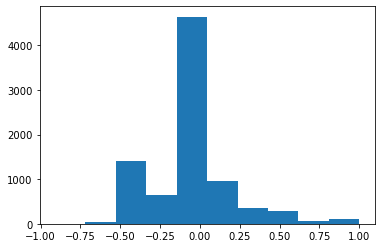

In [ ]:
plt.hist(df['polarity'])
plt.show

##### Looks like the corpus is mostly neutral to Sentiments. There is however a spike of negative sentiments, which one can expect to be the case with Incident data, since users are reporting outages, issues etc. No further conclusion to be drawn from sentiments.

#### Saving cleaned & translated dataset as Excel file for later Clustering Analysis

In [ ]:
df.to_excel("df_concat_cleaned_text_feb26.xlsx")

## ------------------------------------------- MAIN FLOW - Clustering Logic -------------------------------------------------------------------

In [ ]:
df_comb = pd.read_excel("df_concat_cleaned_text_feb26.xlsx")

In [ ]:
! pip install spacy

In [ ]:
import spacy
spacy.prefer_gpu()


False

In [ ]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-02-26 14:06:25.760367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-26 14:06:25.760396: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


##### Lemmatization of Concatenated Cleaned column

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [ ]:
# Take an example of row# 43 Description and lemmatize it
print('\033[1mOriginal text:\033[0m')
print(df_comb['Concat_Cleaned_Text'][43])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df_comb['Concat_Cleaned_Text'][43]))

Original text:
please reroute jobs on printer to printer issue needs to be resolved today received from replaced_username gmail com hi the printer printer is not working and needs a part replaced can you reroute the jobs in queue to printer printer wihuyjdo qpogfwkb has indicated that prqos needs a new part and it may not deliver for a few days so the inwarehouse tools will need to print on printer for now this needs to be taken care of today since the inwarehouse tools are printed and are picked up by an outside vendor at pm in usa on a daily basis please contact dkmcfreg anwmfvlgenkataramdntyana if you have questions about the jobs in queue for today 
____________________________________________________________________________________________________
Lemmatized text:
please reroute job on printer to printer issue need to be resolve today receive from replaced_username gmail com hi the printer printer be not work and need a part replace can you reroute the job in queue to printer prin

In [ ]:
df_comb['Concat_Cleaned_Text'] = df_comb['Concat_Cleaned_Text'].apply(lemmatizer)

In [ ]:
# Create a target categorical column
df_comb['target'] = df_comb['Assignment group'].astype('category').cat.codes
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8500 non-null   int64  
 1   Short description    8492 non-null   object 
 2   Description          8499 non-null   object 
 3   Caller               8500 non-null   object 
 4   Assignment group     8500 non-null   object 
 5   Description_P        8499 non-null   object 
 6   S_Description        8492 non-null   object 
 7   L_Description        8499 non-null   object 
 8   Lang                 8500 non-null   object 
 9   length               8500 non-null   int64  
 10  L_Desc_Cleaned       8499 non-null   object 
 11  S_Desc_Cleaned       8492 non-null   object 
 12  Concat_Cleaned_Text  8500 non-null   object 
 13  polarity             8500 non-null   float64
 14  target               8500 non-null   int8   
dtypes: float64(1), int64(2), int8(1), obje

In [ ]:
# Utilities
from time import time
from PIL import Image
import warnings, pickle, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

warnings.filterwarnings('ignore')
%matplotlib inline

###### Common Functions to call the traditional ML models

In [ ]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

## ------------------------------------------ MAIN FLOW - Model Building ---------------------------------------------------------------------

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


###### **Multinomial Naive Bayes**

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 56.79%
Testing accuracy: 53.41%
Confusion matrix:
 [[760   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  9   0   0 ...   0 112   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.65      0.26      0.37        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

###### **K Nearest Neighbor**

In [ ]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 70.88%
Testing accuracy: 62.18%
Confusion matrix:
 [[742   0   0 ...   0   0   2]
 [  2   2   0 ...   0   1   0]
 [  8   0  11 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0  97   7]
 [ 14   0   0 ...   0  29  11]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77       761
           1       0.50      0.25      0.33         8
           2       0.79      0.46      0.58        24
           3       1.00      0.20      0.33         5
           4       0.51      0.48      0.49        42
           5       0.61      0.42      0.50        26
           6       0.64      0.35      0.45        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.35   

###### **Support Vector Machine -LInear Kernel**

In [ ]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 92.37%
Testing accuracy: 68.41%
Confusion matrix:
 [[719   0   1 ...   0   0   1]
 [  0   3   0 ...   0   1   0]
 [  3   0  14 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  0   1   2 ...   0 101   7]
 [  9   0   0 ...   0  29  15]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       761
           1       0.60      0.38      0.46         8
           2       0.56      0.58      0.57        24
           3       0.50      0.20      0.29         5
           4       0.56      0.67      0.61        42
           5       0.61      0.54      0.57        26
           6       0.40      0.40      0.40        20
           7       1.00      0.12      0.22         8
           8       0.67      0.20      0.31        20
           9       0.88      0.88      0.88    

###### **Support Vector Machine - Kernel RBF**

In [ ]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 82.54%
Testing accuracy: 62.82%
Confusion matrix:
 [[749   0   0 ...   0   0   0]
 [  2   1   0 ...   0   0   0]
 [ 13   0   9 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 109   0]
 [ 16   0   0 ...   0  37   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       761
           1       1.00      0.12      0.22         8
           2       0.82      0.38      0.51        24
           3       0.00      0.00      0.00         5
           4       0.49      0.50      0.49        42
           5       0.62      0.31      0.41        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.89      1.00      0.94        17

###### **Decision Tree Classifier **

In [ ]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 95.40%
Testing accuracy: 57.41%
Confusion matrix:
 [[625   1   1 ...   1   6   1]
 [  1   2   0 ...   0   3   0]
 [  9   0   9 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   1   2 ...   0  95   8]
 [  7   0   0 ...   0  29  11]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76       761
           1       0.29      0.25      0.27         8
           2       0.64      0.38      0.47        24
           3       0.00      0.00      0.00         5
           4       0.36      0.43      0.39        42
           5       0.29      0.15      0.20        26
           6       0.35      0.35      0.35        20
           7       0.10      0.12      0.11         8
           8       0.35      0.35      0.35        20
           9       1.00      1.00 

###### **Random Forest Classifier**

In [ ]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 95.40%
Testing accuracy: 62.35%
Confusion matrix:
 [[752   0   0 ...   0   0   0]
 [  1   2   0 ...   0   1   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   1   2 ...   0 102   8]
 [ 17   0   0 ...   0  29   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.67      0.25      0.36         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.57      0.48      0.52        42
           5       0.43      0.12      0.18        26
           6       1.00      0.20      0.33        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.88 

In [ ]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

###### **Deep Neural Network with TFIDF Embeddings**

In [ ]:
 #Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [ ]:
X_test

6244    ie not launch ie not launch try open in safe m...
6813    erp and network access limitation receive from...
7019    need uasername and password of telephony softw...
5537    email will not open receive from replaced_user...
6307    I have create new material number but when I t...
                              ...                        
4678      mobile device activate   mobile device activate
2571    job hr payroll na u fail in job scheduler at  ...
4510    ms excel right click not work   ms excel right...
2882    skype issue call desk and headset oo my skype ...
2018    jabra headset issue I need a hand set up jabra...
Name: Concat_Cleaned_Text, Length: 1700, dtype: object

In [ ]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    return (X_train,X_test)

In [ ]:
X_train_tfidf,X_test_tfidf = TFIDF(X_train,X_test)

In [ ]:
# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 75)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               4951552   
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)              

In [ ]:
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)

Epoch 1/10
54/54 - 2s - loss: 2.9584 - accuracy: 0.4018 - val_loss: 3.0168 - val_accuracy: 0.4476

Epoch 00001: val_loss improved from inf to 3.01678, saving model to Weights\NN_epoch01_loss3.0168.h5
Epoch 2/10
54/54 - 2s - loss: 1.8340 - accuracy: 0.5862 - val_loss: 2.8222 - val_accuracy: 0.4476

Epoch 00002: val_loss improved from 3.01678 to 2.82217, saving model to Weights\NN_epoch02_loss2.8222.h5
Epoch 3/10
54/54 - 2s - loss: 1.4694 - accuracy: 0.6379 - val_loss: 2.8401 - val_accuracy: 0.4476

Epoch 00003: val_loss did not improve from 2.82217
Epoch 4/10
54/54 - 2s - loss: 1.1550 - accuracy: 0.6993 - val_loss: 2.9583 - val_accuracy: 0.4476

Epoch 00004: val_loss did not improve from 2.82217
Epoch 5/10
54/54 - 2s - loss: 0.9289 - accuracy: 0.7526 - val_loss: 2.6929 - val_accuracy: 0.4482

Epoch 00005: val_loss improved from 2.82217 to 2.69291, saving model to Weights\NN_epoch05_loss2.6929.h5
Epoch 6/10
54/54 - 2s - loss: 0.7378 - accuracy: 0.8035 - val_loss: 2.5579 - val_accuracy: 0

###### **GLOVE Emebddings**

In [ ]:
gloveFileName = 'DataSet - glove.6B.50d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=50
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [ ]:
 #Generate Glove embedded datasets
X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Found 11127 unique tokens.
(8500, 500)
Total 400000 word vectors.


###### **Convolutional Neural Network**

In [ ]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [ ]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

Filter   5
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 500, 50)      556400      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 499, 128)     12928       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 498, 128)     19328       embedding[0][0]                  
___________________________________________________________________________________

In [ ]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

###### **Recurrent Neural Network**

In [ ]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

32
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           556400    
_________________________________________________________________
gru (GRU)                    (None, 500, 32)           8064      
_________________________________________________________________
dropout_19 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 500, 32)           128       
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 32)           6336      
_________________________________________________________________
dropout_20 (Dropout)         (None, 500, 32)           0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 500, 32)       

In [ ]:
def Build_Model_RCNN_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

###### **RCNN**

In [ ]:
# Train the network and run classification
model_RCNN = Build_Model_RCNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RCNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RCNN')

Filter   5
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 500, 50)      556400      input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 499, 128)     12928       embedding_2[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 498, 128)     19328       embedding_2[0][0]                
_________________________________________________________________________________

###### **Bi-Directional LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

###### **LSTM**

In [ ]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 75)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')

Found 11127 unique tokens.
(8500, 500)
Total 400000 word vectors.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 50)           556400    
_________________________________________________________________
dropout_27 (Dropout)         (None, 500, 50)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 499, 256)          25856     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 249, 256)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 248, 256)          131328    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 124, 256)          0         
______________________________________________________

In [ ]:
df_acc_results = pd.read_excel("Capstone_accuracy_results.xlsx")

In [ ]:
df_acc_results

No. of groups for classification     Embeddings               Model Name  \
0                                 75          TFIDF                LinearSVC   
1                                 75          TFIDF                      DNN   
2                                 75          TFIDF                 SVC(rbf)   
3                                 75          TFIDF  RandomForrestClassifier   
4                                 75          TFIDF     KneighborsClassifier   
5                                 75          TFIDF   DecisionTreeClassifier   
6                                 75  Glove.60B.50d       Bidirectional LSTM   
7                                 75          TFIDF            MultinomialNB   
8                                 75  Glove.60B.50d                      CNN   
9                                 75  Glove.60B.50d                     LSTM   
10                                75  Glove.60B.50d                      GRU   

    Train Accuracy  Test Accuracy  
0           0.9237         0.6841  
1           0.8810         0.6347  
2           0.8254         0.6282  
3           0.9540         0.6235  
4           0.7088         0.6218  
5           0.9540         0.5741  
6           0.5860         0.5476  
7           0.5679         0.5341  
8           0.5669         0.5256  
9           0.5575         0.5188  
10          0.5399         0.5053

##### **Model Analysis using all 73 Groups**
1. Linear SVC & SVC(rbf) were the only models with some % of accuracy
2. There's a clear case of Overfitting for all models
3. The standard problem of 753groups is that majority of the classes have minimal accuracy
4. Data is imbalanced & then there's misclassification

###### Final Data saved again as cleandata.xlsx file

In [7]:
!pip install gensim

#### **CLUSTERING LOGIC**

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# string manipulation libs
import re
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

pd.options.display.max_colwidth = 1000

import gensim
from gensim.models import Word2Vec, KeyedVectors
embeddings = 300

word2vec_path = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Each word is a vector of 300 numbers
word2vec['vpn'].shape

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(300,)

In [9]:
# Looking at a sample vector for a word
word2vec['vpn']

array([-6.78710938e-02,  1.93786621e-03,  5.39550781e-02,  1.61132812e-01,
       -1.25976562e-01,  7.47070312e-02, -8.39843750e-02,  6.34765625e-02,
        2.91015625e-01, -3.00292969e-02, -1.47094727e-02,  5.41687012e-04,
       -1.19628906e-01, -1.57226562e-01, -3.39355469e-02,  1.75781250e-01,
        9.91210938e-02, -1.62353516e-02,  2.92968750e-02, -1.28906250e-01,
       -4.46777344e-02,  8.44726562e-02,  7.42187500e-02,  1.95312500e-01,
       -4.63867188e-02,  3.55529785e-03, -4.78515625e-02,  2.57812500e-01,
        7.37304688e-02, -3.33984375e-01, -7.51953125e-02, -1.43554688e-01,
        7.01904297e-03, -2.51953125e-01, -9.47265625e-02, -3.35937500e-01,
       -9.52148438e-02, -3.78417969e-02,  6.49414062e-02, -2.17773438e-01,
       -1.38671875e-01,  3.18359375e-01,  3.55468750e-01,  1.31835938e-01,
        6.88476562e-02, -5.15136719e-02, -1.16699219e-01, -1.33789062e-01,
       -2.94921875e-01, -4.41894531e-02, -1.65039062e-01, -5.10253906e-02,
        2.69531250e-01,  

In [16]:
#Loading all the given datasets
df = pd.read_excel("drive/MyDrive/cleandata.xlsx")
print(df.shape)
df.head() 

(8500, 15)


Unnamed: 0  Unnamed: 0.1              Short description  \
0           0             0                    login issue   
1           1             1                        outlook   
2           2             2             cant log in to vpn   
3           3             3  unable to access hr_tool page   
4           4             4                   skype error    

                                                                                                                                                                                                                                                  Description  \
0                  -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind    
2                                                                                                             _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest    
3                                                                                                                                                                                                                               unable to access hr_tool page   
4                                                                                                                                                                                                                                                skype error    

              Caller Assignment group  \
0  spxjnwir pjlcoqds            GRP_0   
1  hmjdrvpb komuaywn            GRP_0   
2  eylqgodm ybqkwiam            GRP_0   
3  xbkucsvz gcpydteq            GRP_0   
4  owlgqjme qhcozdfx            GRP_0   

                                                                                                                                                                                           Description_P  \
0   verified user details.(employee & manager name) checked the user name in ad and reset the password. advised the user to login and check. caller confirmed that he was able to login. issue resolved.   
1                 received from: hmjdrvpb.komuaywn gmail.com hello team, my meetings skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this ? kind    
2                                                                                                                             received from: eylqgodm.ybqkwiam gmail.com hi i cannot log on to vpn best    
3                                                                                                                                                                          unable to access hr tool page   
4                                                                                                                                                                                           skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                                                                                                                                                                          L_Description  \
0  verified user details.(employee & manager name) checked the user name in ad and reset the password. advised the user to login and check. caller confirmed that he was able to login. issue resol

In [17]:
dfrest = df[df["Assignment group"] != "GRP_99"]

##### **Dropping the GROUP 30 entries for improvement after Interim submission**

In [22]:
dfrest = df[df["Assignment group"] != "GRP_30"]

In [26]:
# Count vectorization of text
from sklearn.feature_extraction.text import CountVectorizer
 
# Ticket Data
corpus = dfrest['Concat_Cleaned_Text'].values
 
# Creating the vectorizer
vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(stop_words='english')
 
# Converting the text to numeric data
X = vectorizer.fit_transform(corpus)
 
#print(vectorizer.get_feature_names())
 
# Preparing Data frame For machine learning
CountVectorizedData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
#CountVectorizedData['group']=dfrest['Assignment group']
print(CountVectorizedData.shape)
CountVectorizedData.head()

(8461, 11985)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aac  aacount  aad  aae  aao  aap  ab  abandon  abap  ...  zvygmnco  zw  \
0   0    0        0    0    0    0    0   0        0     0  ...         0   0   
1   0    0        0    0    0    0    0   0        0     0  ...         0   0   
2   0    0        0    0    0    0    0   0        0     0  ...         0   0   
3   0    0        0    0    0    0    0   0        0     0  ...         0   0   
4   0    0        0    0    0    0    0   0        0     0  ...         0   0   

   zwip  zwkfzfqhveyrfplvnz  zwrypjqv  zwwirep  zyjfpgtk  zz  zzcmpgn  zzsdspc  
0     0                   0         0        0         0   0        0        0  
1     0                   0         0        0         0   0        0        0  
2     0                   0         0        0         0   0        0        0  
3     0                   0         0        0         0   0        0        0  
4     0                   0         0        0         0   0        0        0  

[5 rows x 11985 columns]

In [27]:
# Creating the list of words which are present in the Document term matrix
WordsVocab=CountVectorizedData.columns

# Printing sample words
print(WordsVocab[0:10])

Index(['aa', 'aac', 'aacount', 'aad', 'aae', 'aao', 'aap', 'ab', 'abandon',
       'abap'],
      dtype='object')


In [28]:
# Defining a function which takes text input and returns one vector for each sentence
def FunctionText2Vec(inpTextData):
    # Converting the text to numeric data
    #X = vectorizer.transform(inpTextData)
    #CountVecData=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
    
    # Creating empty dataframe to hold sentences
    W2Vec_Data=pd.DataFrame()
    
    # Looping through each row for the data
    for i in range(CountVectorizedData.shape[0]):
        
 
        # initiating a sentence with all zeros
        Sentence = np.zeros(300)
 
        # Looping thru each word in the sentence and if its present in 
        # the Word2Vec model then storing its vector
        for word in WordsVocab[CountVectorizedData.iloc[i,:]>=1]:
              #print(word)
              try:
                Sentence = Sentence + word2vec[word] #Reading word's embedding from Google Word2Vec
              except:
                pass
        # Appending the sentence to the dataframe
        # Appending the sentence to the dataframe
        W2Vec_Data=W2Vec_Data.append(pd.DataFrame([Sentence]))
    return(W2Vec_Data)

In [29]:
# Since there are so many words... This will take some time :( 
# Calling the function to convert all the text data to Word2Vec Vectors
W2Vec_Data=FunctionText2Vec(dfrest['Concat_Cleaned_Text'])

# Checking the new representation for sentences
W2Vec_Data.shape

(8461, 300)

In [30]:
W2Vec_Data

0         1         2         3         4         5         6    \
0   0.302979 -0.457886 -1.003052  0.566284 -2.223717  1.607544  2.482910   
0  -0.026611  0.394235  0.614410  2.726486 -2.604443 -0.207336  0.208801   
0  -0.103638  0.230035  0.571365  1.677979 -0.729858 -0.336182 -0.093140   
0   0.366699 -0.123535 -0.449646 -0.156067 -0.677185  0.525330  0.118286   
0  -0.180420 -0.225098 -0.276367  0.224609 -0.403320 -0.017090 -0.045898   
..       ...       ...       ...       ...       ...       ...       ...   
0  -0.259658  0.604318  0.439575  0.689651 -1.040760 -0.406616 -1.141632   
0   0.520508 -0.468994 -0.345947  0.517578 -0.476562 -0.243896  0.459473   
0  -0.211975 -0.052246  0.086426  0.368652 -0.106079  0.783203  0.670807   
0   0.055145 -0.022461  0.076721  0.739197 -0.644444  0.866821  0.353149   
0  -0.057190  0.281494  0.835327  1.570923 -0.357788 -0.508667 -0.141693   

         7         8         9    ...       290       291       292       293  \
0  -0.141516  3.827026 -0.729607  ...  0.659363  1.738342 -0.949150 -0.655090   
0  -2.190125  1.183624  1.463898  ... -1.055420  1.327545 -1.143166 -1.093628   
0  -1.112793  1.271973  0.648254  ...  0.185638  0.302177 -0.201118  0.225098   
0  -0.525635  0.638794 -0.396484  ...  0.120422  0.011780 -0.537598  0.728394   
0  -0.357422  0.190430  0.642578  ...  0.338745  0.076660 -0.051514 -0.427734   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0  -0.361511  1.516693  1.302399  ...  0.318208  0.204956 -0.648537 -0.136108   
0   0.021484  0.234283  0.313232  ... -0.258301 -0.109863 -0.087402  0.182251   
0  -0.215820  0.870117  0.277039  ...  0.594604  1.039856 -0.139893 -0.564850   
0  -0.885574  1.919434 -0.067749  ... -1.966187  0.773132 -1.333405  0.650635   
0  -0.330872  0.826931  0.191895  ... -0.913239  0.118156 -0.420776  0.428467   

         294       295       296       297       298       299  
0   1.071533 -0.570618  0.024139 -3.349426 -0.829773 -2.294434  
0   0.858742 -0.588013  0.561062 -1.519348 -0.909424 -1.159741  
0   0.294388 -0.766479  0.107849 -1.339722 -1.240540  0.663696  
0  -0.808105 -0.689941 -0.636732 -0.126465 -0.380463 -0.127930  
0   0.099609 -0.229980 -0.076202 -0.399414 -0.394043  0.181763  
..       ...       ...       ...       ...       ...       ...  
0   2.001797 -0.124828  0.088531 -0.674988  0.005074 -0.496872  
0   0.144531  0.143799 -0.011719 -0.036377 -0.070007 -0.012939  
0   0.451294 -0.357677  0.068237 -0.604980 -0.248901 -0.023758  
0  -0.686729 -0.427185  0.085388 -0.296387 -0.062622 -0.052338  
0   0.105118 -0.188049  0.064819 -0.981567 -0.573608 -0.265625  

[8461 rows x 300 columns]

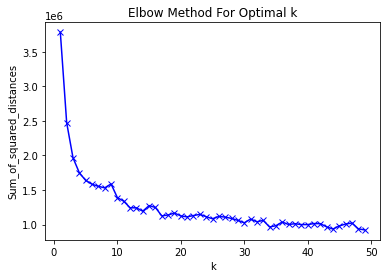

In [31]:
#checking for optimal number of clusters

Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = MiniBatchKMeans(n_clusters=k, random_state=10)
    km = km.fit(W2Vec_Data)
    Sum_of_squared_distances.append(km.inertia_)


import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
# initialize KMeans with 3 clusters
cls = MiniBatchKMeans(n_clusters=8, random_state=42)
cls.fit(W2Vec_Data)
clusters = cls.labels_
clusters

array([0, 0, 6, ..., 1, 1, 1], dtype=int32)

In [33]:
from collections import Counter

print(Counter(clusters).keys()) # equals to list(set(words))
print(Counter(clusters).values()) # counts the elements' frequency

dict_keys([0, 6, 1, 7, 2, 3, 5, 4])
dict_values([1053, 1736, 2599, 2206, 509, 149, 154, 55])


In [34]:
pca = PCA(n_components=2, random_state=10)
reduced_features = pca.fit_transform(W2Vec_Data)

In [35]:
# save the two dimensions in x0 and x1
x0 = reduced_features[:, 0]
x1 = reduced_features[:, 1]
# assign clusters and PCA vectors to columns in the original dataframe
dfrest['cluster'] = clusters
dfrest['x0'] = x0
dfrest['x1'] = x1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [36]:
##cluster_map = {0: "0", 1: "1", 2: "2", 3:"3", 4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"} # mapping found through get_top_keywords
#dfrest['cluster'] = dfrest['cluster'].map(cluster_map)
#dfrest.drop(columns = ['Description', 'Short description','Caller'],inplace=True)
dfrest.head()

Unnamed: 0  Unnamed: 0.1              Short description  \
0           0             0                    login issue   
1           1             1                        outlook   
2           2             2             cant log in to vpn   
3           3             3  unable to access hr_tool page   
4           4             4                   skype error    

                                                                                                                                                                                                                                                  Description  \
0                  -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind    
2                                                                                                             _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest    
3                                                                                                                                                                                                                               unable to access hr_tool page   
4                                                                                                                                                                                                                                                skype error    

              Caller Assignment group  \
0  spxjnwir pjlcoqds            GRP_0   
1  hmjdrvpb komuaywn            GRP_0   
2  eylqgodm ybqkwiam            GRP_0   
3  xbkucsvz gcpydteq            GRP_0   
4  owlgqjme qhcozdfx            GRP_0   

                                                                                                                                                                                           Description_P  \
0   verified user details.(employee & manager name) checked the user name in ad and reset the password. advised the user to login and check. caller confirmed that he was able to login. issue resolved.   
1                 received from: hmjdrvpb.komuaywn gmail.com hello team, my meetings skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this ? kind    
2                                                                                                                             received from: eylqgodm.ybqkwiam gmail.com hi i cannot log on to vpn best    
3                                                                                                                                                                          unable to access hr tool page   
4                                                                                                                                                                                           skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                                                                                                                                                                          L_Description  \
0  verified user details.(employee & manager name) checked the user name in ad and reset the password. advised the user to login and check. caller confirmed that he was able to login. issue resol

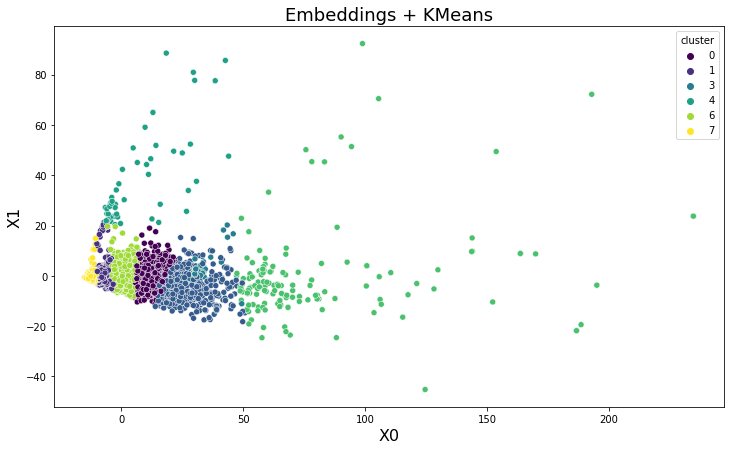

In [37]:
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Embeddings + KMeans", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=dfrest, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()

In [38]:
pd.options.display.max_colwidth = 2000
print(dfrest[dfrest.cluster == 0]["Concat_Cleaned_Text"].shape)
dfrest[dfrest.cluster == 0][["Assignment group","Concat_Cleaned_Text"]].tail(50)

(1053,)


Assignment group  \
8044            GRP_0   
8049           GRP_62   
8053            GRP_2   
8096            GRP_0   
8121           GRP_18   
8122            GRP_0   
8129           GRP_13   
8134            GRP_0   
8148            GRP_0   
8151            GRP_0   
8167            GRP_0   
8197           GRP_73   
8206           GRP_16   
8208           GRP_12   
8209            GRP_0   
8217            GRP_0   
8227            GRP_0   
8229           GRP_25   
8243            GRP_0   
8253            GRP_0   
8256            GRP_2   
8269            GRP_0   
8272            GRP_0   
8320            GRP_0   
8322            GRP_2   
8336           GRP_29   
8352            GRP_0   
8354           GRP_10   
8382           GRP_12   
8392            GRP_0   
8393            GRP_0   
8395           GRP_14   
8412            GRP_0   
8421            GRP_0   
8422           GRP_19   
8427            GRP_0   
8430           GRP_22   
8431           GRP_19   
8437           GRP_15   
8438           GRP_20   
8446           GRP_14   
8454            GRP_0   
8456           GRP_13   
8467            GRP_0   
8468            GRP_0   
8472            GRP_0   
8478            GRP_0   
8481            GRP_9   
8490           GRP_29   
8493           GRP_10   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Concat_Cleaned_Text  
8044                                                                                                                                                                                    warehouse toolmail related to my office phone is not functioning  the warehouse toolmail associated with my office phone is not functioning properly when trying to access warehouse toolmail from my office phone i receive a not possible message on my phone i have also tried to access warehouse toolmail from the number and receive a message that states that my call cannot be completed at this time   
8049                                                                                                                                                                              revisar pc lpaw g rfv usadtto dfsdpor ffthhiago frsilva use microsoft update update adobe acrobat adobe flash and java review groups review and update sep review patching antivirus sw review erp client run check disk defrag and sep scan update dell drivers check for update new version of office package on uacyltoe hxgayczear hits to itau box and hsbc uacyltoe hxgayczear opening of plaghynilhas do itau   
8053                                                                                                                                                                                                                                                                                                                                                                     vvfrtgarnb account disabled account needs to be enabled till th aug received from   gmail com please enable bahbrgy account aerp he is not leaving company until this friday i do not know why his account was disabled today   
8096                                                                                                                                                                                                                                                                                                                                                                                             

In [39]:
pd.options.display.max_colwidth = 2000
print(dfrest[dfrest["cluster"] == 1]["Concat_Cleaned_Text"].shape)
dfrest[dfrest["cluster"] == 1][["Assignment group","Concat_Cleaned_Text","cluster"]].head(50)

(2599,)


Assignment group  \
3             GRP_0   
5             GRP_0   
6             GRP_1   
7             GRP_0   
10            GRP_0   
11            GRP_0   
12            GRP_0   
13            GRP_0   
17            GRP_3   
23            GRP_0   
26            GRP_0   
28            GRP_0   
30            GRP_0   
36            GRP_0   
37            GRP_0   
38            GRP_0   
44            GRP_0   
45            GRP_0   
46            GRP_0   
47            GRP_6   
48            GRP_0   
49            GRP_7   
50            GRP_8   
52            GRP_0   
56            GRP_0   
57            GRP_6   
59            GRP_8   
60            GRP_8   
61            GRP_0   
62            GRP_0   
63            GRP_6   
64            GRP_8   
67            GRP_9   
68            GRP_8   
69            GRP_8   
70            GRP_8   
72            GRP_0   
75           GRP_10   
76           GRP_10   
77           GRP_10   
80            GRP_6   
83            GRP_9   
85            GRP_6   
86            GRP_9   
87            GRP_8   
89            GRP_8   
90            GRP_5   
91            GRP_5   
92            GRP_5   
93            GRP_5   

                                                                                                                                                                                                                 Concat_Cleaned_Text  \
3                                                                                                                                                                        unable to access hr tool page unable to access hr tool page   
5                                                                                                                                      unable to log in to engineering tool and skype unable to log in to engineering tool and skype   
6   event critical hostname company com the value of mountpoint threshold for oracle sid erpdata event critical hostname company com the value of mountpoint threshold for oracle sid erpdata sr psa d sr psa d data perpsr psa d is   
7                                                                                                      ticket no employment status new non employee enter user s name ticket no employment status new non employee enter user s name   
10                                                                                                 engineering tool says not connected and unable to submit reports engineering tool says not connected and unable to submit reports   
11                                                                                                                                                   hr tool site not loading page correctly hr tool site not loading page correctly   
12                                                                                                                     unable to login to hr tool to sgxqsuojr xwbesorf cards unable to login to hr tool to sgxqsuojr xwbesorf cards   
13                                                                                                                                                                 user wants to reset the password user wants to reset the password   
17                                                                                                                                           when undocking pc screen will not come back when undocking pc screen will not come back   
23                                                                                                                                                           user called for vendor phone number user called for vendor phone number   
26                                                                                                                                         unable to login to hr tool to check payslips unable to login to hr tool to check payslips   
28                                           

In [40]:
def f_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

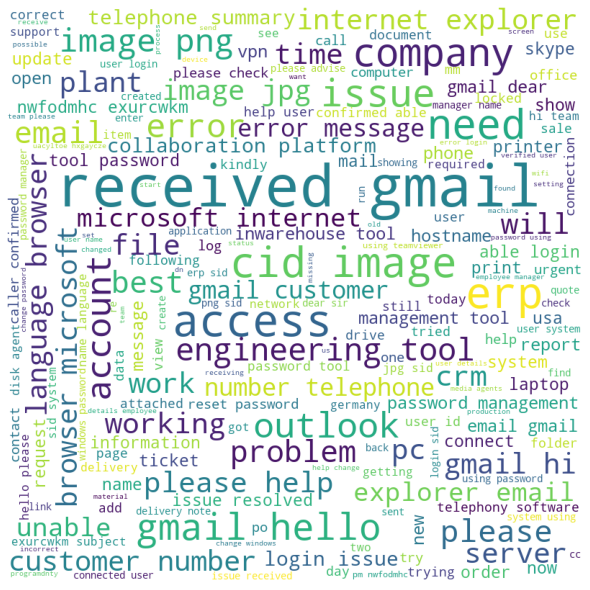

In [45]:
from wordcloud import WordCloud, STOPWORDS 
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==0].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

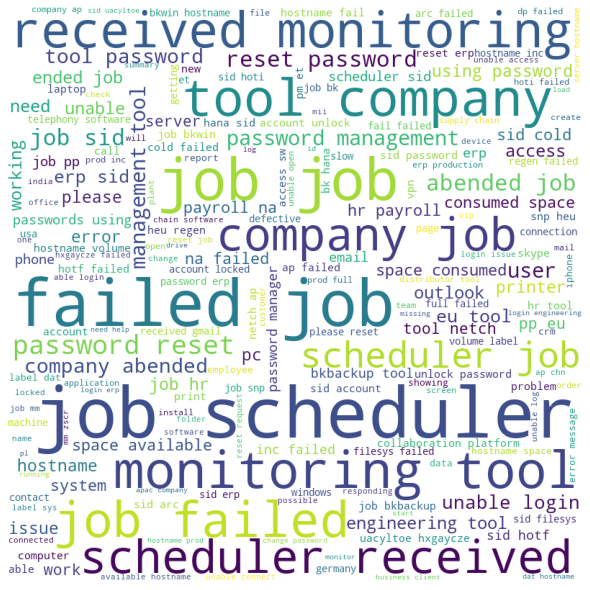

In [46]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==1].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

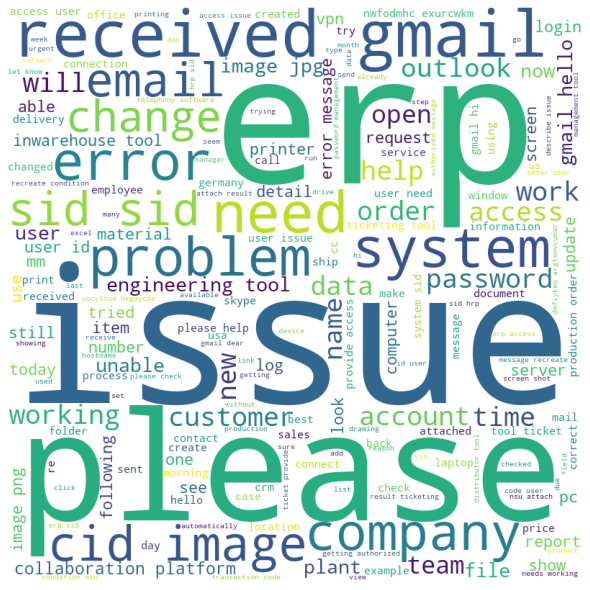

In [47]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==2].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

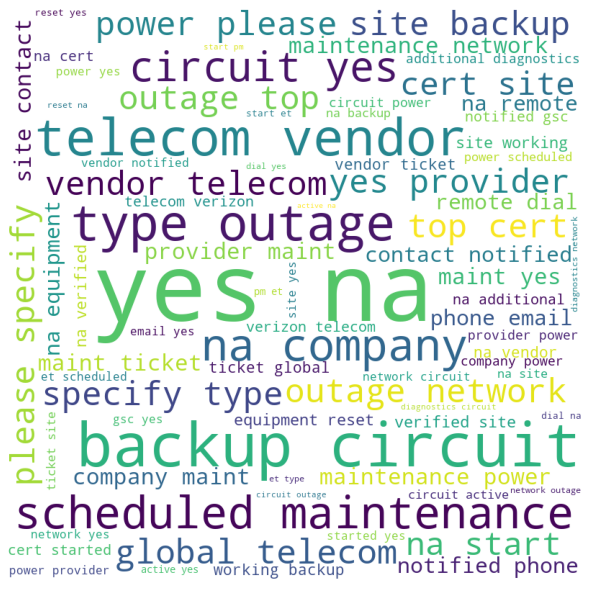

In [48]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==3].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

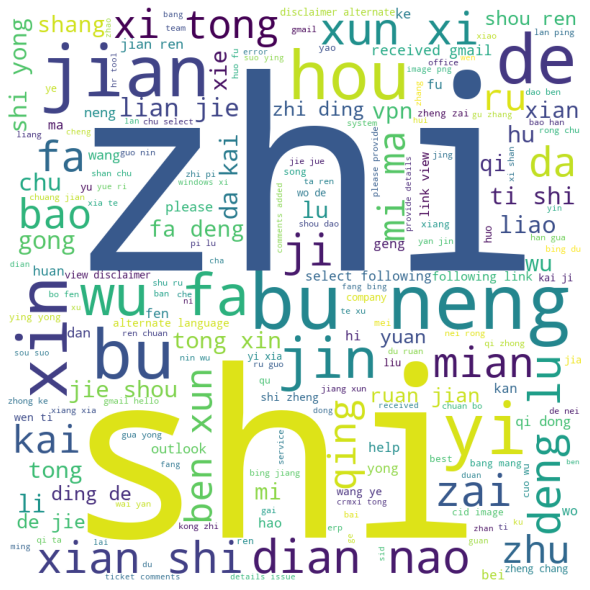

In [49]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==4].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

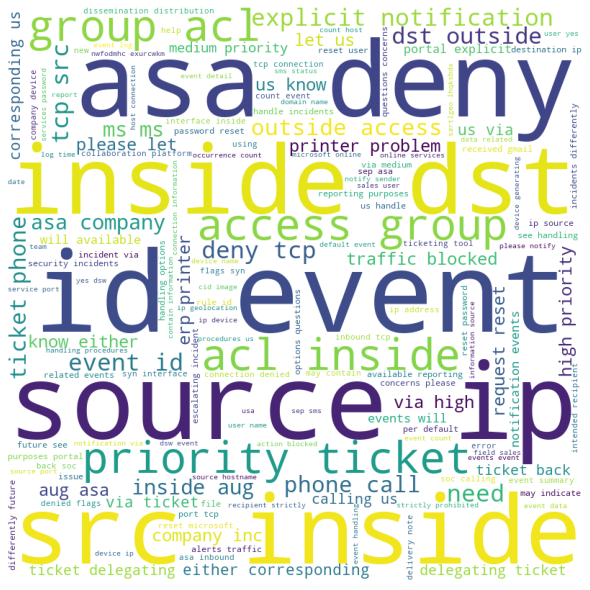

In [50]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==5].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

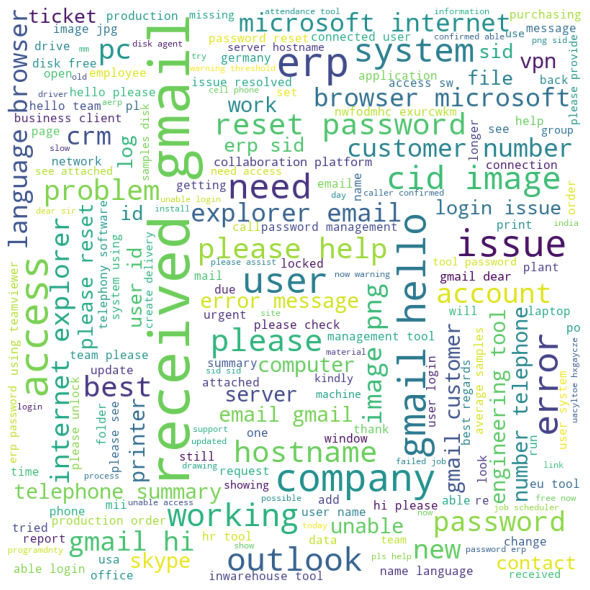

In [51]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==6].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

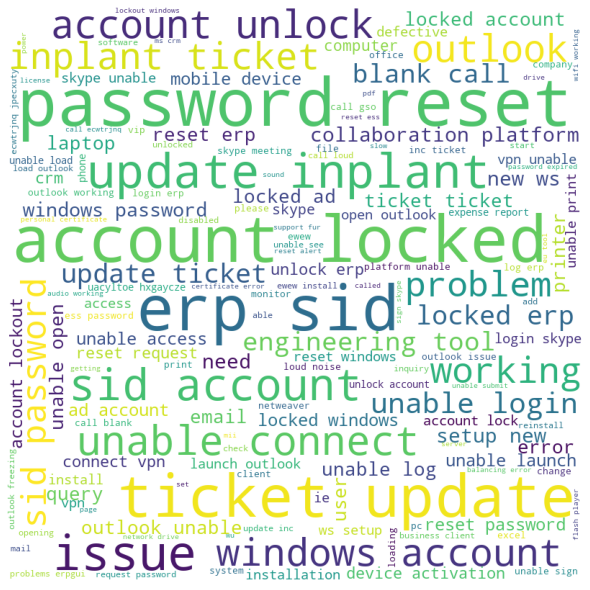

In [52]:
wordcloud = f_word_cloud(dfrest[dfrest['cluster']==7].Concat_Cleaned_Text)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

###### **Saving Cleaned and Clustered Dataset for futher Model Building**





In [54]:
file_name = "drive/MyDrive/data_for_model.xlsx"

  
# saving the excel
dfrest.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


#### **MODEL RE-BUILDING WITH 8 CLUSTERS**

In [55]:
!pip install autocorrect

In [56]:
!pip install unidecode

In [57]:
import pandas as pd
import unidecode 
import re 
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
df = pd.read_excel("drive/MyDrive/data_for_model.xlsx")

#### **EXPLORATORY DATA ANALYSIS**

##### Displaying the head of the data

In [60]:
df.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1              Short description  \
0           0             0               0                    login issue   
1           1             1               1                        outlook   
2           2             2               2             cant log in to vpn   
3           3             3               3  unable to access hr_tool page   
4           4             4               4                   skype error    

                                                                                                                                                                                                                                                  Description  \
0                  -verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind    
2                                                                                                             _x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest    
3                                                                                                                                                                                                                               unable to access hr_tool page   
4                                                                                                                                                                                                                                                skype error    

              Caller Assignment group  \
0  spxjnwir pjlcoqds            GRP_0   
1  hmjdrvpb komuaywn            GRP_0   
2  eylqgodm ybqkwiam            GRP_0   
3  xbkucsvz gcpydteq            GRP_0   
4  owlgqjme qhcozdfx            GRP_0   

                                                                                                                                                                                           Description_P  \
0   verified user details.(employee & manager name) checked the user name in ad and reset the password. advised the user to login and check. caller confirmed that he was able to login. issue resolved.   
1                 received from: hmjdrvpb.komuaywn gmail.com hello team, my meetings skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this ? kind    
2                                                                                                                             received from: eylqgodm.ybqkwiam gmail.com hi i cannot log on to vpn best    
3                                                                                                                                                                          unable to access hr tool page   
4                                                                                                                                                                                           skype error    

                   S_Description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                                                                                                                                                                          L_Description  \
0  verified user details.(employee & manager name) checked the user name in ad and reset the passwo

#### Displaying the number of rows in dataset + explore dataset

In [61]:
print(df.shape[0])

8461


In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8461 entries, 0 to 8460
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8461 non-null   int64  
 1   Unnamed: 0.1         8461 non-null   int64  
 2   Unnamed: 0.1.1       8461 non-null   int64  
 3   Short description    8453 non-null   object 
 4   Description          8460 non-null   object 
 5   Caller               8461 non-null   object 
 6   Assignment group     8461 non-null   object 
 7   Description_P        8460 non-null   object 
 8   S_Description        8453 non-null   object 
 9   L_Description        8460 non-null   object 
 10  Lang                 8461 non-null   object 
 11  length               8461 non-null   int64  
 12  L_Desc_Cleaned       8460 non-null   object 
 13  S_Desc_Cleaned       8453 non-null   object 
 14  Concat_Cleaned_Text  8461 non-null   object 
 15  polarity             8461 non-null   f

In [63]:
!pip install spacy

In [64]:
import spacy
spacy.prefer_gpu()

False

In [65]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 39.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [66]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [67]:
# Take an example of row# 43 Description and lemmatize it
print('\033[1mOriginal text:\033[0m')
print(df['Concat_Cleaned_Text'][43])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(df['Concat_Cleaned_Text'][43]))

Original text:
please reroute jobs on printer to printer issue needs to be resolved today received from   gmail com hi the printer printer is not working and needs a part replaced can you reroute the jobs in queue to printer printer wihuyjdo qpogfwkb has indicated that prqos needs a new part and it may not deliver for a few days so the inwarehouse tools will need to print on printer for now this needs to be taken care of today since the inwarehouse tools are printed and are picked up by an outside vendor at pm in usa on a daily basis please contact dkmcfreg anwmfvlgenkataramdntyana if you have questions about the jobs in queue for today 
____________________________________________________________________________________________________
Lemmatized text:
please reroute job on printer to printer issue need to be resolve today receive from    gmail com hi the printer printer be not work and need a part replace can reroute the job in queue to printer printer wihuyjdo qpogfwkb have indicate

In [68]:
# Utilities
from time import time
from PIL import Image
import warnings, pickle, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
#Common Functions to call the model

In [70]:
#new - making pipelineRequired as False since we dont need countvectorizer and TFid transformer as the data has already been transformed with embeddings
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=False, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [71]:
#new - preparing for test train split
X = df[["x0","x1"]]
y = df["cluster"]
print(X.shape)
print(y.shape)

(8461, 2)
(8461,)


In [72]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6768, 2) (1693, 2)
Shape of the test set: (6768,) (1693,)


#### ***Mulinomial NB with 8 Clusters***

In [73]:
#New - MultinomialNB returned error becos of negative values in PCA columns and hence GaussianNB was used
run_classification(GaussianNB(), X_train, X_test, y_train, y_test)

Estimator: GaussianNB()
Training accuracy: 93.93%
Testing accuracy: 94.57%
Confusion matrix:
 [[222   0   1   0   1   0   5   0]
 [  0 474   0   0   1   0  10  19]
 [  5   0  84   5   0   3   0   0]
 [  0   0   2  26   0   1   0   0]
 [  0   0   0   0   8   0   0   0]
 [  0   0   1   0   0  27   0   0]
 [  9  18   0   0   0   0 334   0]
 [  0  10   0   0   1   0   0 426]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       229
           1       0.94      0.94      0.94       504
           2       0.95      0.87      0.91        97
           3       0.84      0.90      0.87        29
           4       0.73      1.00      0.84         8
           5       0.87      0.96      0.92        28
           6       0.96      0.93      0.94       361
           7       0.96      0.97      0.97       437

    accuracy                           0.95      1693
   macro avg       0.90      0.94      0.92      1693
weigh

#### ***K Nearest Neighbor with 8 Clusters***

In [74]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: KNeighborsClassifier()
Training accuracy: 96.60%
Testing accuracy: 95.10%
Confusion matrix:
 [[226   0   0   0   0   0   3   0]
 [  0 479   0   0   0   0  14  11]
 [  6   0  84   5   0   2   0   0]
 [  0   0   1  27   0   1   0   0]
 [  1   0   0   0   7   0   0   0]
 [  0   0   1   1   0  26   0   0]
 [  8  15   0   0   0   0 338   0]
 [  0  14   0   0   0   0   0 423]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       229
           1       0.94      0.95      0.95       504
           2       0.98      0.87      0.92        97
           3       0.82      0.93      0.87        29
           4       1.00      0.88      0.93         8
           5       0.90      0.93      0.91        28
           6       0.95      0.94      0.94       361
           7       0.97      0.97      0.97       437

    accuracy                           0.95      1693
   macro avg       0.94      0.93      0.93      

#### ***SVM - Linear Kernel with 8 Clusters***

In [75]:
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: LinearSVC()
Training accuracy: 72.07%
Testing accuracy: 71.65%
Confusion matrix:
 [[162   0   0   0   0   0  67   0]
 [  0 489   0   0   1   0   0  14]
 [ 85   0  11   0   0   0   1   0]
 [ 29   0   0   0   0   0   0   0]
 [  0   0   0   0   7   0   1   0]
 [ 14   0   4   0   1   8   1   0]
 [ 35 218   0   0   0   0 108   0]
 [  0   9   0   0   0   0   0 428]]
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.58       229
           1       0.68      0.97      0.80       504
           2       0.73      0.11      0.20        97
           3       0.00      0.00      0.00        29
           4       0.78      0.88      0.82         8
           5       1.00      0.29      0.44        28
           6       0.61      0.30      0.40       361
           7       0.97      0.98      0.97       437

    accuracy                           0.72      1693
   macro avg       0.66      0.53      0.53      1693
weight

#### ***SVM - RBF Kernal with 8 Clusters***

In [76]:
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: SVC()
Training accuracy: 95.52%
Testing accuracy: 95.69%
Confusion matrix:
 [[225   0   0   0   0   0   4   0]
 [  0 482   0   0   0   0   8  14]
 [  7   0  82   6   0   2   0   0]
 [  0   0   0  28   0   1   0   0]
 [  0   0   0   0   8   0   0   0]
 [  0   0   0   0   0  28   0   0]
 [  3  15   0   0   0   0 343   0]
 [  0  13   0   0   0   0   0 424]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       229
           1       0.95      0.96      0.95       504
           2       1.00      0.85      0.92        97
           3       0.82      0.97      0.89        29
           4       1.00      1.00      1.00         8
           5       0.90      1.00      0.95        28
           6       0.97      0.95      0.96       361
           7       0.97      0.97      0.97       437

    accuracy                           0.96      1693
   macro avg       0.95      0.96      0.95      1693
weighted avg

#### ***Decision Tress Classifier with 8 Clusters***

In [77]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: DecisionTreeClassifier()
Training accuracy: 100.00%
Testing accuracy: 93.74%
Confusion matrix:
 [[225   0   1   0   0   0   3   0]
 [  0 467   0   0   0   0  24  13]
 [  8   0  81   5   0   3   0   0]
 [  0   0   5  24   0   0   0   0]
 [  0   0   0   0   8   0   0   0]
 [  0   0   0   0   0  28   0   0]
 [  6  24   0   0   0   0 331   0]
 [  0  14   0   0   0   0   0 423]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       229
           1       0.92      0.93      0.93       504
           2       0.93      0.84      0.88        97
           3       0.83      0.83      0.83        29
           4       1.00      1.00      1.00         8
           5       0.90      1.00      0.95        28
           6       0.92      0.92      0.92       361
           7       0.97      0.97      0.97       437

    accuracy                           0.94      1693
   macro avg       0.93      0.93      0.93   

#### ***Random Forest Classifier with 8 Clusters***

In [78]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: RandomForestClassifier()
Training accuracy: 100.00%
Testing accuracy: 95.69%
Confusion matrix:
 [[228   0   0   0   0   0   1   0]
 [  0 482   0   0   0   0  15   7]
 [  6   0  87   2   0   2   0   0]
 [  0   0   3  26   0   0   0   0]
 [  0   0   0   0   8   0   0   0]
 [  0   0   0   0   0  28   0   0]
 [  7  18   0   0   0   0 336   0]
 [  0  12   0   0   0   0   0 425]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       229
           1       0.94      0.96      0.95       504
           2       0.97      0.90      0.93        97
           3       0.93      0.90      0.91        29
           4       1.00      1.00      1.00         8
           5       0.93      1.00      0.97        28
           6       0.95      0.93      0.94       361
           7       0.98      0.97      0.98       437

    accuracy                           0.96      1693
   macro avg       0.96      0.96      0.96   

In [79]:
#Path where you want to save the weights, model and checkpoints
model_path = "Weights/"
%mkdir Weights

# Define model callbacks
def call_backs(name):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=100)
    model_checkpoint =  ModelCheckpoint(model_path + name + '_epoch{epoch:02d}_loss{val_loss:.4f}.h5',
                                                               monitor='val_loss',
                                                               verbose=1,
                                                               save_best_only=True,
                                                               save_weights_only=False,
                                                               mode='min',
                                                               period=1)
    return [model_checkpoint, early_stopping]

In [80]:
 #Function to build Deep NN
def Build_Model_DNN_Text(shape, nClasses, dropout=0.3):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(Dense(nClasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [81]:
X_test

x0        x1
6678 -13.483893 -1.074873
6656   6.281489 -1.681929
625   20.120941  4.158699
4959  -6.867060  0.319169
828   -1.663730 -0.080404
...         ...       ...
2718  12.577920 -1.542403
4196  -3.462255 -4.030832
6372  -4.867742  1.158748
5272 -13.511400  1.516017
3984 -13.177586 -0.772514

[1693 rows x 2 columns]

#### ***TFIDF Embeddings for DNN***

In [82]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    return (X_train,X_test)

In [83]:
#X_train_tfidf,X_test_tfidf = TFIDF(X_train,X_test)
X_train.shape

(6768, 2)

In [84]:
# Instantiate the network
model_DNN = Build_Model_DNN_Text(X_train.shape[1], 75)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                        

In [85]:
model_DNN.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              callbacks=call_backs("NN"),
                              epochs=10,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test)

Epoch 1/10

Epoch 1: val_loss improved from inf to 5.12905, saving model to Weights/NN_epoch01_loss5.1290.h5
53/53 - 4s - loss: 0.8901 - accuracy: 0.7660 - val_loss: 5.1290 - val_accuracy: 0.4046 - 4s/epoch - 81ms/step
Epoch 2/10

Epoch 2: val_loss improved from 5.12905 to 1.55821, saving model to Weights/NN_epoch02_loss1.5582.h5
53/53 - 2s - loss: 0.3922 - accuracy: 0.8545 - val_loss: 1.5582 - val_accuracy: 0.6621 - 2s/epoch - 38ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.55821 to 0.74440, saving model to Weights/NN_epoch03_loss0.7444.h5
53/53 - 2s - loss: 0.3426 - accuracy: 0.8652 - val_loss: 0.7444 - val_accuracy: 0.7885 - 2s/epoch - 38ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.74440 to 0.42390, saving model to Weights/NN_epoch04_loss0.4239.h5
53/53 - 2s - loss: 0.3413 - accuracy: 0.8734 - val_loss: 0.4239 - val_accuracy: 0.8760 - 2s/epoch - 38ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.42390 to 0.38331, saving model to Weights/NN_epoch05_loss0.3833.h5

#### ***GLOVE Embeddings for Other Models***

In [86]:
gloveFileName = 'drive/MyDrive/glove.6B.50d.txt'
MAX_SEQUENCE_LENGTH = 500
EMBEDDING_DIM=50
MAX_NB_WORDS=75000

# Function to generate Embedding
def loadData_Tokenizer(X_train, X_test,filename):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open(filename, encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)


embedding_matrix = []

def buildEmbed_matrices(word_index,embedding_dim):
    embedding_matrix = np.random.random((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])), "into shape",str(len(embedding_vector)),
                      " Please make sure your"" EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [87]:
#Generate Glove embedded datasets
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df.Concat_Cleaned_Text, 
                                                    df.cluster, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

X_train_Glove, X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

Shape of the training set: (6768,) (1693,)
Shape of the test set: (6768,) (1693,)
Found 12011 unique tokens.
(8461, 500)
Total 400000 word vectors.


#### ***CNN using Glove Embeddings with 8 Clusters***

In [88]:
def Build_Model_CNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_batch1 = BatchNormalization()(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_batch1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_batch2 = BatchNormalization()(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_batch2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [89]:
# Train the network and run classification
model_CNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_CNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='CNN')

Filter   5
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 500, 50)      600600      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 499, 128)     12928       ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 498, 128)     19328       ['embedding[0][0]']              
                                                                                   

#### ***RNN using Glove Embeddings with 8 Clusters***

In [90]:
def Build_Model_RNN_Text(word_index, embeddings_matrix, nclasses,dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_matrix, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    word_index in word index ,
    embeddings_matrix is embeddings_matrix, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
        model.add(BatchNormalization())
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='sgd',
                      metrics=['accuracy'])
    
    print(model.summary())
    return model

In [91]:
# Train the network and run classification
model_RNN = Build_Model_RNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RNN')

32
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           600600    
                                                                 
 gru (GRU)                   (None, 500, 32)           8064      
                                                                 
 dropout_9 (Dropout)         (None, 500, 32)           0         
                                                                 
 batch_normalization_6 (Batc  (None, 500, 32)          128       
 hNormalization)                                                 
                                                                 
 gru_1 (GRU)                 (None, 500, 32)           6336      
                                                                 
 dropout_10 (Dropout)        (None, 500, 32)           0         
                                                   

#### ***RCNN using Glove Embeddings with 8 Clusters***

In [92]:
def Build_Model_RCNN_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [93]:
#new - CNN changed to RCNN
# Train the network and run classification
model_RCNN = Build_Model_RCNN_Text(word_index,embedding_matrix, 75)
#model_RCNN = Build_Model_CNN_Text(word_index,embedding_matrix, 75)
run_classification(model_RCNN, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='RCNN')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 50)           600600    
                                                                 
 dropout_13 (Dropout)        (None, 500, 50)           0         
                                                                 
 batch_normalization_11 (Bat  (None, 500, 50)          200       
 chNormalization)                                                
                                                                 
 conv1d_7 (Conv1D)           (None, 499, 256)          25856     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 249, 256)         0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 248, 256)         

#### ***LSTM using Glove Embeddings with 8 Clusters***

In [94]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional


def Build_Model_LTSM_Text(word_index, embeddings_matrix, nclasses):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embeddings_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2)))
    model.add(Bidirectional(LSTM(gru_node, recurrent_dropout=0.2)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    print(model.summary())
    return model

In [95]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test,gloveFileName)
embedding_matrix = buildEmbed_matrices(word_index,EMBEDDING_DIM)

model_LTSM = Build_Model_LTSM_Text(word_index,embedding_matrix, 75)
run_classification(model_LTSM, X_train_Glove, X_test_Glove, y_train, y_test,pipelineRequired = False,isDeepModel=True, arch_name='LSTM')

Found 12011 unique tokens.
(8461, 500)
Total 400000 word vectors.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 50)           600600    
                                                                 
 dropout_18 (Dropout)        (None, 500, 50)           0         
                                                                 
 conv1d_11 (Conv1D)          (None, 499, 256)          25856     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 249, 256)         0         
 g1D)                                                            
                                                                 
 conv1d_12 (Conv1D)          (None, 248, 256)          131328    
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 124, 256)        

#### The below output shows the accuracy figures achieved:
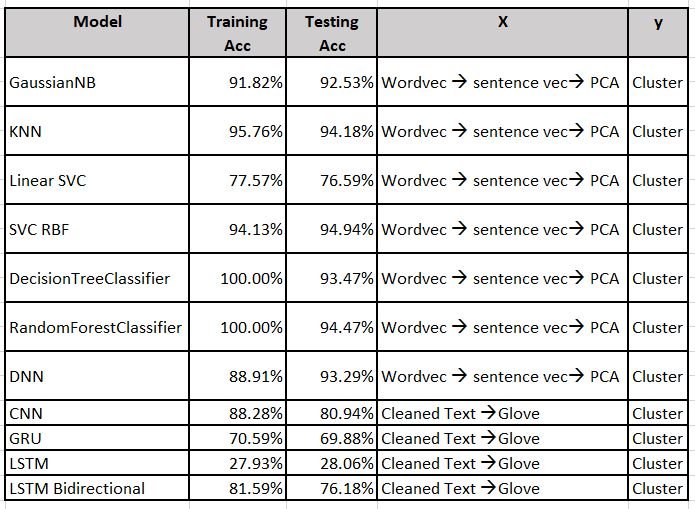

## --------------------------------------- ADDITIONAL EXPERIMENT1 - Topic Modelling ----------------------------------------------

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("input-data.xlsx", index_col=False)

#Displaying the head of the dataa
df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [4]:
df.shape

(8500, 4)

In [5]:
print("Total number of classes: ", len(df['Assignment group'].unique()))

Total number of classes:  74


Class Distribution

In [6]:
df_labels = df['Assignment group'].value_counts().reset_index()
df_labels['percentage'] = ((df_labels['Assignment group']/df_labels['Assignment group'].sum())*100).round().astype(int)
df_labels.head()

index  Assignment group  percentage
0   GRP_0              3976          47
1   GRP_8               661           8
2  GRP_24               289           3
3  GRP_12               257           3
4   GRP_9               252           3

In [7]:
df_labels.rename(columns = {'index': 'Assignment group', 'Assignment group':'Ticket_Count'}, inplace = True)
df_labels.head(20)

Assignment group  Ticket_Count  percentage
0             GRP_0          3976          47
1             GRP_8           661           8
2            GRP_24           289           3
3            GRP_12           257           3
4             GRP_9           252           3
5             GRP_2           241           3
6            GRP_19           215           3
7             GRP_3           200           2
8             GRP_6           184           2
9            GRP_13           145           2
10           GRP_10           140           2
11            GRP_5           129           2
12           GRP_14           118           1
13           GRP_25           116           1
14           GRP_33           107           1
15            GRP_4           100           1
16           GRP_29            97           1
17           GRP_18            88           1
18           GRP_16            85           1
19           GRP_17            81           1

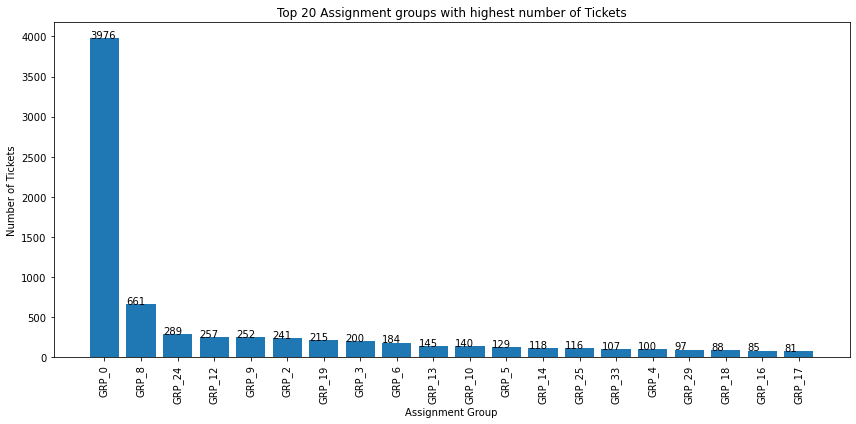

In [8]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_labels.head(20)['Assignment group'], df_labels.head(20)['Ticket_Count'])
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

Let's try **Topic Modelling**

In [11]:
df_incidents = df.drop('Caller',axis=1)

In [12]:
#Replace NaN values in Short Description and Description columns
df_incidents['Short description'] = df_incidents['Short description'].replace(np.nan, '', regex=True)
df_incidents['Description'] = df_incidents['Description'].replace(np.nan, '', regex=True)

In [13]:
#Concatenate Short Description and Description columns
df_incidents['New_Description'] = df_incidents['Short description'] + ' ' +df_incidents['Description']

In [14]:
import re
def clean_email(text):
    pattern= re.compile(r'mail message from:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'sent:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'file path:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'contact information:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'fw:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r're:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'from:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'to:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'cc:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'email:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'subject:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern = re.compile(r'\S*@\S*\s?')
    text = pattern.sub(r' ', text)
    
    return text


def remove_html_tags(html_text):
    pattern = re.compile(r'<.*?>(.*?)<.*?>')
    html_text = pattern.sub('', html_text)
    pattern = re.compile(r'https?:\/\/.*[\r\n]*')
    html_text = pattern.sub('',html_text)
    return html_text


def remove_common(text):
    pattern= re.compile(r'date:(.*?)\\r\\n')
    text = pattern.sub(r' ', text)
    pattern= re.compile(r'[0-9][\-0–90-9 ]+') # phone
    text = pattern.sub(r' ', text)
    pattern= re.compile(r'\d+') # alphanumeric
    text = pattern.sub(r' ', text)
    pattern= re.compile(r'[^a-zA-z]+')
    text = pattern.sub(r' ', text)
    pattern= re.compile(r'\W*\b\w{1,2}\b') # single letter
    text = pattern.sub(r' ', text)
    return text
    

def remove_trailing(text):
    trailing_space = re.compile(r'\\t|\\n|\\r|\t|\n|\r')
    text = trailing_space.sub(r' ', text)   
    return text

def remove_extra_white_space(text):
    trailing_space = re.compile(r'\s\s+')
    text = trailing_space.sub(r' ', text)
    return text
    
    

def cleaning_process(text):
    text = text.lower()
    cleaned_email = clean_email(text)
    cleaned_tags = remove_html_tags(cleaned_email)
    remove_common_text = remove_common(cleaned_tags)
    remove_trailing_text = remove_trailing(remove_common_text)
    final_text = remove_extra_white_space(remove_trailing_text)
    return final_text

In [15]:
df_incidents['New_Description_Processed'] = df_incidents['New_Description'].apply(cleaning_process)

In [16]:
df_incidents.tail()

Short description  \
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description Assignment group  \
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...           GRP_29   
8496                           telephony_software issue            GRP_0   
8497  vip2: windows password reset for tifpdchb pedx...            GRP_0   
8498  i am unable to access the machine utilities to...           GRP_62   
8499  an mehreren pc`s lassen sich verschiedene prgr...           GRP_49   

                                        New_Description  \
8495  emails not coming in from zz mail _x000D_\n_x0...   
8496  telephony_software issue telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498  machine nÃ£o estÃ¡ funcionando i am unable to ...   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                              New_Description_Processed  
8495  emails not coming from mail received from good...  
8496  telephony_software issue telephony_software issue  
8497  vip windows password reset for tifpdchb pedxru...  
8498  machine est funcionando unable access the mach...  
8499   mehreren lassen sich verschiedene prgramdntym...

In [18]:
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=e22871d65406ea1b6d289fdc0d7c0bf493800f86c08213868e75b778d6a916cd
  Stored in directory: c:\users\rohini gokul\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=a653bf8965182726802a17da277c1e137a78fc256924ffa621cd0678cd840cff
  Stored in directory: c:\users\rohini gokul\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc89

In [20]:
import gensim
from gensim import corpora
from gensim.corpora.dictionary import Dictionary
import spacy
import pyLDAvis
#import pyLDAvis.gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
text = df_incidents['New_Description_Processed']

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(text))

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Form Bigrams
data_words_nostops = remove_stopwords(data_words)

data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# print(data_lemmatized[:1])

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
texts = data_lemmatized

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.055*"open" + 0.052*"work" + 0.041*"summary" + 0.033*"name" + '
  '0.033*"computer" + 0.030*"add" + 0.025*"print" + 0.025*"printer" + '
  '0.021*"need" + 0.019*"install"'),
 (1,
  '0.043*"hostname" + 0.037*"company" + 0.029*"event" + 0.028*"server" + '
  '0.018*"group_acl_inside" + 0.017*"deny_tcp" + 0.016*"dst_outside" + '
  '0.012*"com" + 0.012*"also" + 0.012*"screen"'),
 (2,
  '0.040*"issue" + 0.038*"user" + 0.031*"error" + 0.030*"unable" + '
  '0.029*"receive" + 0.024*"login" + 0.019*"system" + 0.019*"use" + '
  '0.018*"device" + 0.018*"get"'),
 (3,
  '0.061*"email" + 0.031*"new" + 0.028*"call" + 0.027*"skype" + 0.027*"send" + '
  '0.024*"phone" + 0.023*"outlook" + 0.020*"team" + 0.020*"mail" + '
  '0.019*"setup"'),
 (4,
  '0.117*"access" + 0.092*"account" + 0.041*"file" + 0.040*"lock" + '
  '0.024*"show" + 0.023*"service" + 0.023*"problem" + 0.023*"process" + '
  '0.021*"application" + 0.018*"run"'),
 (5,
  '0.225*"password" + 0.139*"reset" + 0.060*"window" + 0.036*"produ

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
import pyLDAvis.gensim_models

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.208558 -0.122442       1        1  28.588722
1      0.374885 -0.105375       2        1  15.224499
6     -0.003651 -0.233864       3        1  13.450223
4     -0.006572  0.146103       4        1  11.155985
3     -0.096258 -0.136156       5        1  10.790687
0     -0.083272  0.055181       6        1   7.107046
5     -0.052956  0.191182       7        1   6.971047
7      0.076383  0.205371       8        1   6.711791, topic_info=             Term         Freq        Total Category  logprob  loglift
10       password  1934.000000  1934.000000  Default  30.0000  30.0000
159           job  2461.000000  2461.000000  Default  29.0000  29.0000
28         access  1604.000000  1604.000000  Default  28.0000  28.0000
62          reset  1313.000000  1313.000000  Default  27.0000  27.0000
6546       abende  1543.000000  1543.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1619  transaction    49.709659    50.531179   Topic8  -5.1134   2.6849
2472      battery    45.104385    45.925709   Topic8  -5.2107   2.6833
87            sid   726.873279   949.144006   Topic8  -2.4309   2.4345
52         ticket   766.397409  1069.040281   Topic8  -2.3779   2.3685
102          need    92.655550   905.517861   Topic8  -4.4908   0.4217

[321 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
241       3  0.999205         _
6546      3  0.999290    abende
0         1  0.997954      able
28        4  0.999278    access
85        4  0.999562   account
...     ...       ...       ...
80        6  0.472086      work
80        8  0.001029      work
115       6  0.990432   working
1816      2  0.995060     wrong
6331      7  0.960769  zdsxmcwu

[305 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 7, 5, 4, 1, 6, 8])

**In Topic modelling**: 

**Perplexity** is the measure of how well a model predicts unseen data. *The lower the better*.
**Coherence score** on the other hand, helps us to measure how interpretable the topics are to humans. *The higher the better*.

In [36]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\Rohini Gokul\latest\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -7.127095484019845

Coherence Score:  0.336071218701461


Pretty good on both Perplexity and Coherence. We can still tune hyperparameters to come up with the optimal number of topics.

## ------------------------------------------- ADDITIONAL EXPERIMENT2 - BERT Summarization ------------------------------------

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 1000

In [ ]:
#Loading all the given datasets
df = pd.read_excel("drive/MyDrive/data/cleandata.xlsx")
print(df.shape)
df.head() 

(8500, 15)


Unnamed: 0  ...  polarity
0           0  ...      0.45
1           1  ...      0.60
2           2  ...      1.00
3           3  ...     -0.50
4           4  ...      0.00

[5 rows x 15 columns]

BERT Abstractive summarization

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 57.4 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 895 kB 58.4 MB/s 
     |████████████████████████████████| 6.5 MB 39.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Import Libraries

In [ ]:
from transformers import pipeline

In [ ]:
index = 1
pd.options.display.max_colwidth = 2000
print(df.Concat_Cleaned_Text[index])

outlook received from   gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind


In [ ]:
len(df.Concat_Cleaned_Text[index])

168

In [ ]:
# Initialize the HuggingFace summarization pipeline
summarizer = pipeline("summarization")
summarized = summarizer(df.Concat_Cleaned_Text[index], min_length=1, max_length=2)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [ ]:
# Print summarized text
index = 5
print(df.Concat_Cleaned_Text[index])
summarized = summarizer(df.Concat_Cleaned_Text[index], min_length=1, max_length=10)
summ0 = summarized[0]["summary_text"]
print(summ0)
summarized = summarizer(summ0, min_length=1, max_length=6)
summ1 = summarized[0]["summary_text"]
print(summ1)

unable to log in to engineering tool and skype unable to log in to engineering tool and skype
 unable to log in to engineering tool
 Unable to log


## ------------------------------------------------ ADDITIONAL EXPERIMENT3 - Fast Text ------------------------------------------------

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fasttext

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gl-ticket-dump-csv/input_data.csv
/kaggle/input/gl-capstone-cleaned-data/df_concat_cleaned_text_feb26.csv
/kaggle/input/fasttext-file/ticket13.stackexchange.txt
/kaggle/input/fasttext-df/df13.csv
/kaggle/input/popular-embedding/wiki-news-300d-1M/wiki-news-300d-1M.vec
/kaggle/input/popular-embedding/paragram_300_sl999/README.txt
/kaggle/input/popular-embedding/paragram_300_sl999/paragram_300_sl999.txt
/kaggle/input/popular-embedding/glove.840B.300d/glove.840B.300d.txt
/kaggle/input/popular-embedding/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin
/kaggle/input/popular-embedding/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec
/kaggle/input/popular-embedding/embeddings/paragram_300_sl999/README.txt
/kaggle/input/popular-embedding/embeddings/paragram_300_sl999/paragram_300_sl999.txt
/kaggle/input/popular-embedding/embeddings/glove.840B.300d/glove.840B.300d.txt
/kaggle/input/popular-embedding/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-neg

Now, that we are predicting good on 8 clusters, let us understand few practical implications.

Traditionally, ITSM systems for any organization, has been there for quite sometime now and generally carry forward the legacy data. They were not exactly calibrated keeping machine learning into consideration. Hence, it is common to see a lot of slicing and dicing in Target column (Assignment Group in our case.)

So, while the clusters (and the prdiction on them) is going to provide a long term value to the business, we must consider at this point that ITSM system recalibration (or migration/upgrade) is a project in itself and takes a lot of planning, resource, money etc. They might consider the clusters defined by our model, when they're ready to "redo" their ITSM system.

So, **what's the immediate value** to the business from our predictive model ?

An immediate value can be derived if we are able to predict target Assignment Groups, which is already there in their system. This will

1. Reduce manual effort to classify tickets
2. Reduce manual error in such classification
3. Reduced MTTR (Mean time to resolution)

In short, **cost and time savings of Global help desk**, so that the existing staff can concentrate on more important tasks and let AI takeover the classification. Service Desk engineers can also provide feedback to the model's output from time to time, which will increase the "quality of the Ground Truth", which in turn will serve the model better. As, we have seen in the research paper "**Requirements for an IT Support System based on Hybrid Intelligence**", this is how a "**Hybrid Intelligence**" will be put in place to **increase overall organization efficiency**.

Below we will try 2 approaches:

1. Predicting on all classes
2. Predicting on popular classes having significant ticket coverage

Also, we will use **Facebook's embedding technique called fasttext**, which works on the **morphology of a word**, hence increases chance of classifying unseen text better.

**Predicting on all classes**

In [2]:
#Loading the cleaned dataset
df = pd.read_csv("../input/gl-capstone-cleaned-data/df_concat_cleaned_text_feb26.csv", index_col=False)

In [3]:
df.head(10)

Unnamed: 0                                  Short description  \
0           0                                        login issue   
1           1                                            outlook   
2           2                                 cant log in to vpn   
3           3                      unable to access hr_tool page   
4           4                                       skype error    
5           5     unable to log in to engineering tool and skype   
6           6  event: critical:HostName_221.company.com the v...   
7           7  ticket_no1550391- employment status - new non-...   
8           8               unable to disable add ins on outlook   
9           9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2  \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group                                      Description_P  \
0            GRP_0   verified user details.(employee & manager nam...   
1            GRP_0   received from: hmjdrvpb.komuaywn gmail.com he...   
2            GRP_0   received from: eylqgodm.ybqkwiam gmail.com hi...   
3            GRP_0                      unable to access hr tool page   
4            GRP_0                                       skype error    
5            GRP_0     unable to log in to engineering tool and skype   
6            GRP_1  event: critical:HostName .company.com the valu...   
7            GRP_0  ticket no employment status new non employee e...   
8            GRP_0               unable to disable add ins on outlook   
9            GRP_0                          ticket update on inplant    

                                       S_Description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr tool page   
4                                        skype error   
5     unable to log in to engineering tool and skype   
6  event: critical:HostName .company.com the valu...   
7  ticket no employment status new non employee e...   
8               unable to disable add ins on outlook   
9                           ticket update on inplant   

                                       L_Description Lang  length  \
0  verified user details.(employee & manager name...   en     197   
1  received from: hmjdrvpb.komuaywn gmail.com hel...   en     183   
2  received from: eylqgodm.ybqkwiam gmail.com hi ...   en      75   
3                      unable to access hr tool page   en      29   
4                                        skype error   no      12   
5     unable to log in to engineering tool and skype   en      46   
6  event: critical:HostName .company.com the valu...   en     136   
7  ticket no employment status new non employee e...   en      63   
8               unable to disable add ins on outlook   en      36   
9                           ticket update on inplant   en      25   

                                      L_Desc_Cleaned  \
0  verified user details employee manager name ch...   
1  received from replaced_username gmail com hell...   
2  received from replaced_username gmail com hi i...   
3                      

In [4]:
df1=pd.DataFrame()
df1['Y']= df['Assignment group']
df1['X']=df['Concat_Cleaned_Text']

In [5]:
#Modifying dataset as per fasttext requirements
def convert_label(label):
    return '__label__'+str(label)

In [6]:
df1['Y'] = df1['Y'].apply(convert_label)

In [7]:
print(df1.head())
print(df1.tail())

                Y                                                  X
0  __label__GRP_0  login issue verified user details employee man...
1  __label__GRP_0  outlook received from replaced_username gmail ...
2  __label__GRP_0  cant log in to vpn received from replaced_user...
3  __label__GRP_0  unable to access hr tool page unable to access...
4  __label__GRP_0                            skype error skype error
                    Y                                                  X
8495  __label__GRP_29  emails not coming in from zz mail received fro...
8496   __label__GRP_0  telephony software issue telephony software issue
8497   __label__GRP_0  vip windows password reset for tifpdchb pedxru...
8498  __label__GRP_62  machine is not working i am unable to access t...
8499  __label__GRP_49  different programs cannot be opened on several...


In [8]:
df_label_counts = df1['Y'].value_counts().rename_axis('groups').reset_index(name='counts')

In [9]:
#We will remove groups having just 1 row in them, since they can't be stratified during train test split

A = df_label_counts[df_label_counts.counts==1]
print(A)

             groups  counts
68  __label__GRP_61       1
69  __label__GRP_64       1
70  __label__GRP_67       1
71  __label__GRP_35       1
72  __label__GRP_70       1
73  __label__GRP_73       1


In [10]:
print(df1[df1.Y=='__label__GRP_61'])
print(df1[df1.Y=='__label__GRP_64'])
print(df1[df1.Y=='__label__GRP_67'])
print(df1[df1.Y=='__label__GRP_35'])
print(df1[df1.Y=='__label__GRP_70'])
print(df1[df1.Y=='__label__GRP_73'])

                    Y                                                  X
3036  __label__GRP_61   srvlavpwdrprd company company com is not resp...
                    Y                                                  X
3628  __label__GRP_64  r ticket no change in report zsdslsum last ema...
                    Y                                                  X
5154  __label__GRP_67  unable to complete forecast unable to complete...
                   Y                                                  X
401  __label__GRP_35  need access to erp kp need access to kp to ent...
                    Y                                                  X
6401  __label__GRP_70  a link on an e mail says i am forbidden an e m...
                    Y                                                  X
8197  __label__GRP_73  oneteam sso not working i m unable to log in t...


In [11]:
df1.drop(df1.index[[3036,3628,5154,401,6401,8197]], inplace=True)

In [12]:
df1.shape

(8494, 2)

In [13]:
df1.shape

(8494, 2)

In [14]:
#Train Test split, Stratified due to class imbalance
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.X, 
                                                    df1.Y, 
                                                    test_size=0.20,
                                                    stratify=df1.Y,
                                                    random_state=42)

In [15]:
df1_train = pd.DataFrame()
df1_train['Y'] = y_train
df1_train['X'] = X_train

In [16]:
df1_train.head()

Y                                                  X
2515   __label__GRP_0  vpn issues received from replaced_username gma...
6507  __label__GRP_24  problems with java xmlbfjpg yegzbvru problems ...
6164   __label__GRP_0  problems weekly report received from replaced_...
541    __label__GRP_0  unable to login to skype unable to login to skype
8106  __label__GRP_19  networking issue at customer site received fro...

In [17]:
df1_test = pd.DataFrame()
df1_test['Y'] = y_test
df1_test['X'] = X_test

In [18]:
df1_test.head()

Y                                                  X
5341   __label__GRP_4  firmware upgrade on the phones davgtgyrh calle...
3939   __label__GRP_0  cannot print anymore on tc printer is asking f...
2966  __label__GRP_21  please restart the sid server today pm est hel...
6980   __label__GRP_0  unlock account email in cell phone the users f...
3183   __label__GRP_0            hr tool etime query hr tool etime query

In [19]:
print(df1_train.shape)
print(df1_test.shape)

(6795, 2)
(1699, 2)


In [20]:
np.savetxt(r'train_ticket.stackexchange1.txt', df1_train.values, fmt='%s %s')
np.savetxt(r'test_ticket.stackexchange1.txt', df1_test.values, fmt='%s %s')

In [21]:
! tail train_ticket.stackexchange1.txt

__label__GRP_0 unable to login to the hub misplaced username password 
__label__GRP_53 erp mae id seems to be locked in hana sid erp mae id seems to be locked in hana sid request for unlock 
__label__GRP_5 job bkbackup tool o primary prod full failed in job scheduler at  received from monitoring tool company com job bkbackup tool o primary prod full failed in job scheduler at 
__label__GRP_0 password reset request password reset request
__label__GRP_18 da fu email address link to delivery not zhuan fa supply chaint t lf kc de kuai di dan hao chu lai liao ma  received from replaced_username gmail com hello qing cui yi xia xin jia po xie xie shun zhu shang qi best
__label__GRP_0 outlook not accepting password outlook outlook not accepting password outlook
__label__GRP_0 unable to reply to emails unable to reply to emails
__label__GRP_19 aiuw india patching antivirus sw desktop server is offline this pc is offline since th sept
__label__GRP_0 dedalus report on pdf blocked  summary cannot 

In [22]:
! head test_ticket.stackexchange1.txt

__label__GRP_4 firmware upgrade on the phones davgtgyrh called in for an issue where there was supposed to be a firmware upgrade on the phones but davgtgyrh mentioned that the phones are still rebooting and its on a loop 
__label__GRP_0 cannot print anymore on tc printer is asking for trusted source and driver install but does still not work after update 
__label__GRP_21 please restart the sid server today pm est hello team java changes are moved to production but unfortunately db changes were not moved so we request you please restart the sid server to reflected dba changes in production 
__label__GRP_0 unlock account email in cell phone the users fernando fillipini zspvxrfk xocyhnkf and fabio rghkiriuytes hello team could you please unlock account email in cell phone the users owdrqmit nhdzcuji gmail com zspvxrfk xocyhnkf gmail com gtdxpofz xnksbrwl gmail com
__label__GRP_0 hr tool etime query hr tool etime query
__label__GRP_0 printer configuration printer configuration summary i ne

In [23]:
#Default model, without any hyperparameters
model = fasttext.train_supervised(input="train_ticket.stackexchange1.txt")

Read 0M words
Number of words:  11042
Number of labels: 68
Progress: 100.0% words/sec/thread: 1039546 lr:  0.000000 avg.loss:  2.223488 ETA:   0h 0m 0s


In [24]:
model.test("test_ticket.stackexchange1.txt")

(1699, 0.5715126545026487, 0.5715126545026487)

**57%** Accuracy on **68** groups, covering **99%** tickets.
We can try some hyper parameter tuning

In [93]:
model12 = fasttext.train_supervised(input="train_ticket.stackexchange1.txt", epoch=50, lr=1.0, wordNgrams=2, bucket=200000, dim=100, loss='ova')

Read 0M words
Number of words:  11042
Number of labels: 68
Progress: 100.0% words/sec/thread: 1036700 lr:  0.000000 avg.loss:  0.672682 ETA:   0h 0m 0s 68.2% words/sec/thread: 1045601 lr:  0.318255 avg.loss:  0.857334 ETA:   0h 0m 1s


In [94]:
model12.test("test_ticket.stackexchange1.txt")

(1699, 0.7086521483225426, 0.7086521483225426)

**Best Hyper parameters**
epoch=50, lr=1.0, wordNgrams=2, bucket=200000, dim=100, loss='ova'

In [95]:
y_pred = model1.predict(df1_test['X'].tolist())
y_true = df1_test['Y'].tolist()
y_pred1 = []
for i in y_pred[0]:
    y_pred1.append(i)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred1, normalize=True)*100)

70.62978222483814


**~71%** Accuracy and **f1-score** of **~0.71** on **68** groups, covering **99.99%** tickets.
We can definitely better this by Hyper parameter tuning

In [28]:
#model2 = fasttext.train_supervised(input='train_ticket.stackexchange1.txt', autotuneValidationFile='test_ticket.stackexchange1.txt', autotuneDuration=400)
#Hyperparamter tuning needs resources

In [29]:
#model2.test("test_ticket.stackexchange1.txt")

Predicting for **top 17** classes covering **85%** tickets
So we will now drop this **15%** data, which is presumable "noise". The assumption will be right if the test accuracy surges beyond **71%**.

In [30]:
df2=pd.DataFrame()
df2['Y']= df['Assignment group']
df2['X']=df['Concat_Cleaned_Text']

In [31]:
df_label_counts = df2['Y'].value_counts().rename_axis('groups').reset_index(name='counts')
df_label_counts.head()

groups  counts
0   GRP_0    3976
1   GRP_8     661
2  GRP_24     289
3  GRP_12     257
4   GRP_9     252

In [32]:
#Top 17 groups contribute to 85% of tickets
top_groups = df_label_counts[:17]
top_groups_list = top_groups['groups'].tolist()
print(top_groups_list)

['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19', 'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25', 'GRP_33', 'GRP_4', 'GRP_29']


In [33]:
print(df2.head())
print(df2.tail())

       Y                                                  X
0  GRP_0  login issue verified user details employee man...
1  GRP_0  outlook received from replaced_username gmail ...
2  GRP_0  cant log in to vpn received from replaced_user...
3  GRP_0  unable to access hr tool page unable to access...
4  GRP_0                            skype error skype error
           Y                                                  X
8495  GRP_29  emails not coming in from zz mail received fro...
8496   GRP_0  telephony software issue telephony software issue
8497   GRP_0  vip windows password reset for tifpdchb pedxru...
8498  GRP_62  machine is not working i am unable to access t...
8499  GRP_49  different programs cannot be opened on several...


In [34]:
def merging_group(group):
    if group not in top_groups_list:
        return 'DEFAULT'
    else:
        return group

In [35]:
df2['Y1'] = df2['Y'].apply(merging_group)

In [36]:
df2.drop(['Y'], axis = 1, inplace=True)

In [37]:
df2.shape

(8500, 2)

In [38]:
df2.head()

X     Y1
0  login issue verified user details employee man...  GRP_0
1  outlook received from replaced_username gmail ...  GRP_0
2  cant log in to vpn received from replaced_user...  GRP_0
3  unable to access hr tool page unable to access...  GRP_0
4                            skype error skype error  GRP_0

In [39]:
df_label_counts = df2['Y1'].value_counts().rename_axis('groups').reset_index(name='counts')
print(df_label_counts)

     groups  counts
0     GRP_0    3976
1   DEFAULT    1273
2     GRP_8     661
3    GRP_24     289
4    GRP_12     257
5     GRP_9     252
6     GRP_2     241
7    GRP_19     215
8     GRP_3     200
9     GRP_6     184
10   GRP_13     145
11   GRP_10     140
12    GRP_5     129
13   GRP_14     118
14   GRP_25     116
15   GRP_33     107
16    GRP_4     100
17   GRP_29      97


In [40]:
#Removing the merged classes from the entire dataset
df2 = df2[df2['Y1'] != 'DEFAULT']

In [41]:
df2.shape

(7227, 2)

In [42]:
df2['Y1'] = df2['Y1'].apply(convert_label)

In [43]:
print(df2.head())
print(df2.tail())

                                                   X              Y1
0  login issue verified user details employee man...  __label__GRP_0
1  outlook received from replaced_username gmail ...  __label__GRP_0
2  cant log in to vpn received from replaced_user...  __label__GRP_0
3  unable to access hr tool page unable to access...  __label__GRP_0
4                            skype error skype error  __label__GRP_0
                                                      X               Y1
8493  erp fi ob two accounts to be added i am sorry ...  __label__GRP_10
8494  tablet needs reimaged due to multiple issues w...   __label__GRP_3
8495  emails not coming in from zz mail received fro...  __label__GRP_29
8496  telephony software issue telephony software issue   __label__GRP_0
8497  vip windows password reset for tifpdchb pedxru...   __label__GRP_0


In [44]:
df2.head()

X              Y1
0  login issue verified user details employee man...  __label__GRP_0
1  outlook received from replaced_username gmail ...  __label__GRP_0
2  cant log in to vpn received from replaced_user...  __label__GRP_0
3  unable to access hr tool page unable to access...  __label__GRP_0
4                            skype error skype error  __label__GRP_0

In [45]:
#Train Test split, Stratified due to class imbalance
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.X, 
                                                    df2.Y1, 
                                                    test_size=0.20,
                                                    stratify=df2.Y1,
                                                    random_state=42)

In [46]:
df2_train = pd.DataFrame()
df2_train['Y'] = y_train
df2_train['X'] = X_train

In [47]:
df2_test = pd.DataFrame()
df2_test['Y'] = y_test
df2_test['X'] = X_test

In [48]:
print(df2_train.shape)
print(df2_test.shape)

(5781, 2)
(1446, 2)


In [49]:
np.savetxt(r'train_ticket.stackexchange.txt', df2_train.values, fmt='%s %s')
np.savetxt(r'test_ticket.stackexchange.txt', df2_test.values, fmt='%s %s')

In [83]:
model3 = fasttext.train_supervised(input="train_ticket.stackexchange.txt", epoch=25, lr=0.5, wordNgrams=2, bucket=200000, dim=100, loss='ova')

Read 0M words
Number of words:  9212
Number of labels: 17
Progress: 100.0% words/sec/thread: 1620896 lr:  0.000000 avg.loss:  0.619809 ETA:   0h 0m 0s


**Best Hyper parameters**

epoch=25, lr=0.5, wordNgrams=2, bucket=200000, dim=100, loss='ova'

In [84]:
model3.test("test_ticket.stackexchange.txt")

(1446, 0.784923928077455, 0.784923928077455)

In [96]:
y_pred = model3.predict(df2_test['X'].tolist())
y_true = df2_test['Y'].tolist()
y_pred1 = []
for i in y_pred[0]:
    y_pred1.append(i)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred1, normalize=True)*100)

78.4923928077455


**~79%** Accuracy and **F1-score** of **0.79**. That is a **9%** increase on unseen data.

In [53]:
#model5 = fasttext.train_supervised(input='train_ticket.stackexchange.txt', autotuneValidationFile='test_ticket.stackexchange.txt')#, autotuneDuration=600)
#Hyperparamter tuning needs resources

In [54]:
#model5.test("test_ticket.stackexchange.txt")

**Conclusion**: 

**79 out of 100 times** AI is going to **predict** a ticket into the **right Assignment group**! 

This roughly translates to a **straight 79% time savings of Service Desk team members**, who were tasked with manually classifying tickets. 
Let's say the average time to manually classify a ticket is **5 minutes**. So, for a load of **8500 tickets**, the total time taken to classify this would have been **~708 hours**, which will now be **~148 hours**. That's a **savings of ~560 man hours**. Further, with the saved time, Service Desk Agents can now concentrate on enhancing the quality of the Ground Truth, which will in turn allow the AI to produce better results in future.

In [97]:
model3.predict("One of the hard drives has failed in the US file server 002", k=2)#, threshold=0.3

(('__label__GRP_0', '__label__GRP_12'), array([0.06372499, 0.0010105 ]))

In [98]:
model3.predict("purchase order not created for sales number 12345", k=2)

(('__label__GRP_13', '__label__GRP_29'), array([0.05666243, 0.00248262]))

In [99]:
model3.predict("Can't find my active content version 4", k=2)

(('__label__GRP_0', '__label__GRP_29'),
 array([9.61543798e-01, 1.00000034e-05]))

Model is **biased towards Grp_0** due to **class imbalance**. Let's look at classwise classification report.

In [100]:
from sklearn.metrics import classification_report
target_names = top_groups_list
print(classification_report(y_true, y_pred1, target_names=target_names, digits=4))

              precision    recall  f1-score   support

       GRP_0     0.8470    0.9598    0.8999       796
       GRP_8     1.0000    0.5000    0.6667        28
      GRP_24     0.6957    0.6154    0.6531        52
      GRP_12     0.6071    0.5862    0.5965        29
       GRP_9     0.5294    0.3750    0.4390        24
       GRP_2     0.5667    0.3953    0.4658        43
      GRP_19     0.6111    0.4583    0.5238        48
       GRP_3     0.9592    0.8103    0.8785        58
       GRP_6     0.8571    0.5217    0.6486        23
      GRP_13     0.7059    0.6316    0.6667        19
      GRP_10     0.6667    0.4500    0.5373        40
       GRP_5     0.9091    0.4762    0.6250        21
      GRP_14     0.4118    0.3500    0.3784        20
      GRP_25     0.7143    0.3846    0.5000        26
      GRP_33     0.7727    0.4595    0.5763        37
       GRP_4     0.6437    0.8485    0.7320       132
      GRP_29     0.5357    0.3000    0.3846        50

    accuracy              

As feared, **model is biased towards Group 0**. Since precision and recall aren't much relevant in ticket classification, let's look at **f1-score as our metric of choice**.

**Groups 14(20), 29(50), 9(24) and 2(43)** are having **f1 score below 0.5**. Hence, these are the groups where the misclassifications are highest and in dire need of improvement of data both **qualitatively** and **quantitatively**.

**NEXT STEPS**:

1. **More data** - Atleast **a year's data** will be better for such a modelling. Apart from volume for thinly populated classes, it can additionally provide us "**seasonality**" information, if any, to avoid any "**model drift**".

2. **Feedback to model output** - With AI saving time for mundane tasks, the human taskforce can be better utilized in augmenting the model output by **correcting misclassifications**, **separating low quality ground truth from high quality one** etc. This effort can be "**gamified**" with a reward system, which will lay the basis for more state-of-art concepts like **Reinforcement Learning** in future.

## ------------------------------------------------ ADDITIONAL EXPERIMENT4 - Augmentation -----------------------------------------

In [ ]:
import tensorflow
tensorflow.__version__
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 3.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=1cba4a726146c13da1291a88934480c986638e5980802956c2d71984f7599adf
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
import pandas as pd

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 3.1 MB/s 


In [ ]:
df_comb = pd.read_excel("drive/MyDrive/data_for_model.xlsx")

In [ ]:
! pip install spacy

In [ ]:
import spacy
spacy.prefer_gpu()

False

In [ ]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 2.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
df_comb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Short description',
       'Description', 'Caller', 'Assignment group', 'Description_P',
       'S_Description', 'L_Description', 'Lang', 'length', 'L_Desc_Cleaned',
       'S_Desc_Cleaned', 'Concat_Cleaned_Text', 'polarity', 'cluster', 'x0',
       'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'],
      dtype='object')

In [ ]:
!pip install nlpaug

     |████████████████████████████████| 410 kB 4.0 MB/s 


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
# Create a target categorical column
df_comb['target'] = df_comb['Assignment group'].astype('category').cat.codes
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8500 non-null   int64  
 1   Unnamed: 0.1         8500 non-null   int64  
 2   Unnamed: 0.1.1       8500 non-null   int64  
 3   Short description    8492 non-null   object 
 4   Description          8499 non-null   object 
 5   Caller               8500 non-null   object 
 6   Assignment group     8500 non-null   object 
 7   Description_P        8499 non-null   object 
 8   S_Description        8492 non-null   object 
 9   L_Description        8499 non-null   object 
 10  Lang                 8500 non-null   object 
 11  length               8500 non-null   int64  
 12  L_Desc_Cleaned       8499 non-null   object 
 13  S_Desc_Cleaned       8492 non-null   object 
 14  Concat_Cleaned_Text  8500 non-null   object 
 15  polarity             8500 non-null   f

In [ ]:
# Utilities
from time import time
from PIL import Image
import warnings, pickle, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


#### **Augmentation applied**

In [ ]:
groups = y_train.value_counts().reset_index(name="count").query("count < 10")["index"]

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

1. aug_max represents the # of words to replace by its synonym
2. n = 10 generates 10 new augmented sentences

In [ ]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  for val in groups:
    if y_train[i]==val:
      temps=aug.augment(X_train[i],n=10)
      for sent in temps:
        augmented_sentences.append(sent)
        augmented_sentences_labels.append(val)

In [ ]:
len(augmented_sentences_labels)

910

In [ ]:
len(augmented_sentences)

910

###### Training & Test sets size after Augmentation

In [ ]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(7710,)
(7710,)


#### Naive Bayes Model after Augmentation

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 50.57%
Testing accuracy: 53.24%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  9   0   0 ...   0 112   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.69      0.26      0.38        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

#### KNN after Augmentation

In [ ]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 74.58%
Testing accuracy: 62.82%
Confusion matrix:
 [[728   0   0 ...   0   0   2]
 [  2   2   0 ...   0   0   0]
 [  9   0   9 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0  80  28]
 [ 14   0   0 ...   0   7  31]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.96      0.77       761
           1       0.50      0.25      0.33         8
           2       0.75      0.38      0.50        24
           3       1.00      0.20      0.33         5
           4       0.49      0.40      0.44        42
           5       0.67      0.31      0.42        26
           6       0.58      0.35      0.44        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00   

In [ ]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 93.62%
Testing accuracy: 68.59%
Confusion matrix:
 [[716   0   1 ...   0   0   2]
 [  0   3   0 ...   0   1   0]
 [  5   0  13 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   1   2 ...   0 102   7]
 [  8   0   0 ...   0  29  15]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       761
           1       0.60      0.38      0.46         8
           2       0.59      0.54      0.57        24
           3       0.67      0.40      0.50         5
           4       0.55      0.64      0.59        42
           5       0.61      0.54      0.57        26
           6       0.40      0.40      0.40        20
           7       1.00      0.12      0.22         8
           8       0.67      0.20      0.31        20
           9       0.94      0.88      0.91    

In [ ]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 85.46%
Testing accuracy: 62.24%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  2   1   0 ...   0   0   0]
 [ 14   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 103   7]
 [ 16   0   0 ...   0  30   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.99      0.75       761
           1       1.00      0.12      0.22         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.49      0.50      0.49        42
           5       0.60      0.23      0.33        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        17

In [ ]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 95.91%
Testing accuracy: 55.59%
Confusion matrix:
 [[613   1   3 ...   0   6   3]
 [  0   2   0 ...   0   2   0]
 [  6   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   1   3 ...   0  94   8]
 [  4   0   1 ...   0  29  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.75       761
           1       0.29      0.25      0.27         8
           2       0.40      0.33      0.36        24
           3       0.00      0.00      0.00         5
           4       0.32      0.38      0.35        42
           5       0.11      0.08      0.09        26
           6       0.18      0.15      0.16        20
           7       0.00      0.00      0.00         8
           8       0.33      0.25      0.29        20
           9       1.00      1.00 

In [ ]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 95.91%
Testing accuracy: 61.71%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  1   2   0 ...   0   2   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   1   2 ...   0 100   8]
 [ 17   0   0 ...   0  29   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.67      0.25      0.36         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.58      0.45      0.51        42
           5       0.00      0.00      0.00        26
           6       1.00      0.25      0.40        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00 

In [10]:
import tensorflow
tensorflow.__version__
from google.colab import drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd

In [13]:
df_comb = pd.read_excel("drive/MyDrive/data_for_model.xlsx")

In [14]:
df_comb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Short description',
       'Description', 'Caller', 'Assignment group', 'Description_P',
       'S_Description', 'L_Description', 'Lang', 'length', 'L_Desc_Cleaned',
       'S_Desc_Cleaned', 'Concat_Cleaned_Text', 'polarity', 'cluster', 'x0',
       'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'],
      dtype='object')

#### **AugLy: Facebook just recently released the AugLy package to the public domain. AugLy library is divided into four sub-libraries, each for different kinds of data modalities (audio, images, videos and texts).**

In [12]:
! pip install -U augly

     |████████████████████████████████| 40.1 MB 1.2 MB/s 
     |████████████████████████████████| 111 kB 54.3 MB/s 
     |████████████████████████████████| 394 kB 53.5 MB/s 
     |████████████████████████████████| 4.3 MB 51.5 MB/s 
     |████████████████████████████████| 749 kB 66.2 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [13]:
!sudo apt-get install python3-magic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmagic-mgc libmagic1
Suggested packages:
  file
The following NEW packages will be installed:
  libmagic-mgc libmagic1 python3-magic
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 262 kB of archives.
After this operation, 5,257 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-magic all 2:0.4.15-1 [9,280 B]
Fetched 262 kB in 0s (2,711 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 

In [6]:
import augly.text as textaugs

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Create a target categorical column
df_comb['target'] = df_comb['Assignment group'].astype('category').cat.codes
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8500 non-null   int64  
 1   Unnamed: 0.1         8500 non-null   int64  
 2   Unnamed: 0.1.1       8500 non-null   int64  
 3   Short description    8492 non-null   object 
 4   Description          8499 non-null   object 
 5   Caller               8500 non-null   object 
 6   Assignment group     8500 non-null   object 
 7   Description_P        8499 non-null   object 
 8   S_Description        8492 non-null   object 
 9   L_Description        8499 non-null   object 
 10  Lang                 8500 non-null   object 
 11  length               8500 non-null   int64  
 12  L_Desc_Cleaned       8499 non-null   object 
 13  S_Desc_Cleaned       8492 non-null   object 
 14  Concat_Cleaned_Text  8500 non-null   object 
 15  polarity             8500 non-null   f

In [17]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


In [36]:
#groups = y_train.value_counts().reset_index(name="count").query("count < 10")["index"]

In [31]:
X_train

2706    remote sid connection open for oss system sid ...
6263    circuit outage india telecom vendor mbps circu...
4687        erp sid account unlock erp sid account unlock
3966    user switzerlandim blocked in netweaver receiv...
5441    oo till friday crm web access unable to load p...
                              ...                        
5734    mii password reset unlock account mii password...
5191    delivery due list created no delivery note for...
5390    unable to edit quantities under oppurtunities ...
860     eu tool for plant plant is working very slowly...
7270    firewall company internal pix company com at l...
Name: Concat_Cleaned_Text, Length: 6800, dtype: object

In [18]:
# Utilities
from time import time
from PIL import Image
import warnings, pickle, string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential, Model
from keras.layers.merge import Concatenate
from keras.layers import Input, Dropout, Flatten, Dense, Embedding, LSTM, GRU
from keras.layers import BatchNormalization, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Traditional Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# NLP toolkits
import spacy
import nltk
from nltk import tokenize

warnings.filterwarnings('ignore')
%matplotlib inline

In [19]:
# A class that logs the time
class Timer():
    '''
    A generic class to log the time
    '''
    def __init__(self):
        self.start_ts = None
    def start(self):
        self.start_ts = time()
    def stop(self):
        return 'Time taken: %2fs' % (time()-self.start_ts)
    
timer = Timer()

# A method that plots the Precision-Recall curve
def plot_prec_recall_vs_thresh(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend()

# A method to train and test the model
def run_classification(estimator, X_train, X_test, y_train, y_test, arch_name=None, pipelineRequired=True, isDeepModel=False):
    timer.start()
    # train the model
    clf = estimator

    if pipelineRequired :
        clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', estimator),
                     ])
      
    if isDeepModel :
        clf.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=128,verbose=1,callbacks=call_backs(arch_name))
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_pred = np.argmax(y_pred, axis=1)
        y_train_pred = clf.predict(X_train)
        y_train_pred = np.argmax(y_train_pred, axis=1)
    else :
        clf.fit(X_train, y_train)
        # predict from the claffier
        y_pred = clf.predict(X_test)
        y_train_pred = clf.predict(X_train)
    
    print('Estimator:', clf)
    print('='*80)
    print('Training accuracy: %.2f%%' % (accuracy_score(y_train,y_train_pred) * 100))
    print('Testing accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('='*80)
    print('Confusion matrix:\n %s' % (confusion_matrix(y_test, y_pred)))
    print('='*80)
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))
    print(timer.stop(), 'to run the model')

In [9]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


### **AugLy - Replace Fun Fonts **





In [44]:
meta = []
for i in X_train.index:
  X_train[i] = textaugs.replace_fun_fonts(X_train[i], vary_fonts=True, granularity="word", metadata=meta)

In [45]:
#meta

In [46]:
len(meta)

6800

#### Naive Bayes Model after Augmentation

In [51]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 56.69%
Testing accuracy: 53.41%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  9   0   0 ...   0 112   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.69      0.26      0.38        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

#### KNN after Augmentation

In [52]:
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 69.76%
Testing accuracy: 61.88%
Confusion matrix:
 [[736   0   0 ...   0   0   2]
 [  3   2   0 ...   0   2   0]
 [ 10   0   9 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0  77   3]
 [ 16   0   0 ...   0   8   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.97      0.77       761
           1       0.50      0.25      0.33         8
           2       0.75      0.38      0.50        24
           3       1.00      0.20      0.33         5
           4       0.47      0.40      0.44        42
           5       0.62      0.31      0.41        26
           6       0.58      0.35      0.44        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00   

In [53]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 92.75%
Testing accuracy: 68.24%
Confusion matrix:
 [[718   0   0 ...   0   0   2]
 [  0   3   0 ...   0   1   0]
 [  5   0  14 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   1   2 ...   0 102   7]
 [  8   0   0 ...   0  29  15]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       761
           1       0.60      0.38      0.46         8
           2       0.61      0.58      0.60        24
           3       0.67      0.40      0.50         5
           4       0.53      0.60      0.56        42
           5       0.70      0.54      0.61        26
           6       0.35      0.35      0.35        20
           7       1.00      0.12      0.22         8
           8       0.75      0.15      0.25        20
           9       0.94      0.88      0.91    

In [54]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 82.54%
Testing accuracy: 62.29%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  2   1   0 ...   0   0   0]
 [ 14   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 103   7]
 [ 16   0   0 ...   0  30   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.99      0.75       761
           1       1.00      0.12      0.22         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.49      0.50      0.49        42
           5       0.60      0.23      0.33        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        17

In [55]:
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 95.37%
Testing accuracy: 56.94%
Confusion matrix:
 [[628   1   5 ...   0   4   2]
 [  1   1   0 ...   0   2   0]
 [  8   0   9 ...   0   1   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   1   2 ...   0  96   8]
 [  7   0   0 ...   0  29   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       761
           1       0.20      0.12      0.15         8
           2       0.33      0.38      0.35        24
           3       0.00      0.00      0.00         5
           4       0.33      0.40      0.37        42
           5       0.09      0.08      0.08        26
           6       0.28      0.35      0.31        20
           7       0.17      0.12      0.14         8
           8       0.38      0.30      0.33        20
           9       1.00      0.94 

In [56]:
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 95.37%
Testing accuracy: 61.82%
Confusion matrix:
 [[750   0   0 ...   0   0   0]
 [  2   0   0 ...   0   3   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   1   2 ...   0 100   8]
 [ 17   0   0 ...   0  29   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.00      0.00      0.00         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.58      0.52      0.55        42
           5       0.25      0.04      0.07        26
           6       1.00      0.30      0.46        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00 

#### AugLy simulate_typos

In [57]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


In [58]:
for i in X_train.index:
  X_train[i] = textaugs.simulate_typos(X_train[i])

In [59]:
# Naive Bayes
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 54.99%
Testing accuracy: 51.24%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  4   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [ 17   0   0 ...   0 104   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.67      0.14      0.24        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

In [60]:
# KNN 
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 69.34%
Testing accuracy: 62.29%
Confusion matrix:
 [[742   0   0 ...   0   4   1]
 [  1   1   0 ...   0   1   0]
 [  9   0  11 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  5   0   2 ...   0 104   0]
 [ 14   0   0 ...   0  36   5]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.98      0.77       761
           1       1.00      0.12      0.22         8
           2       0.85      0.46      0.59        24
           3       1.00      0.20      0.33         5
           4       0.53      0.45      0.49        42
           5       0.36      0.15      0.22        26
           6       0.64      0.35      0.45        20
           7       0.00      0.00      0.00         8
           8       1.00      0.05      0.10        20
           9       1.00      0.82   

In [61]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 98.56%
Testing accuracy: 67.29%
Confusion matrix:
 [[716   0   0 ...   0   0   4]
 [  0   2   0 ...   0   1   0]
 [  5   0  13 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   0   2 ...   0 105   7]
 [  8   0   0 ...   0  29  16]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83       761
           1       0.67      0.25      0.36         8
           2       0.62      0.54      0.58        24
           3       1.00      0.40      0.57         5
           4       0.51      0.62      0.56        42
           5       0.63      0.46      0.53        26
           6       0.38      0.40      0.39        20
           7       1.00      0.12      0.22         8
           8       0.50      0.15      0.23        20
           9       0.88      0.88      0.88    

In [62]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 81.32%
Testing accuracy: 60.94%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  2   0   0 ...   0   0   0]
 [ 15   0   8 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 112   0]
 [ 17   0   0 ...   0  37   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.74       761
           1       0.00      0.00      0.00         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.44      0.48      0.46        42
           5       0.57      0.15      0.24        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        17

In [63]:
# Decision Tree
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 100.00%
Testing accuracy: 54.65%
Confusion matrix:
 [[629   0   0 ...   0   1   2]
 [  0   1   0 ...   0   2   0]
 [  5   0   8 ...   0   1   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   3 ...   0  92   7]
 [  6   0   1 ...   0  30   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       761
           1       0.50      0.12      0.20         8
           2       0.42      0.33      0.37        24
           3       0.00      0.00      0.00         5
           4       0.32      0.38      0.35        42
           5       0.20      0.23      0.21        26
           6       0.30      0.35      0.33        20
           7       0.15      0.25      0.19         8
           8       0.36      0.25      0.29        20
           9       0.67      0.24

In [64]:
# Random Forest
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 100.00%
Testing accuracy: 60.35%
Confusion matrix:
 [[754   0   0 ...   0   0   0]
 [  2   0   0 ...   0   3   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0 107   7]
 [ 17   0   0 ...   0  31   7]]
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.99      0.74       761
           1       0.00      0.00      0.00         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.52      0.38      0.44        42
           5       0.00      0.00      0.00        26
           6       1.00      0.20      0.33        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00

#### AugLy - Replace Similar Unicode Chars

In [65]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


In [66]:
meta = []
for i in X_train.index:
  aug = textaugs.ReplaceSimilarUnicodeChars(aug_word_p=0.6)
  X_train[i] = aug(X_train[i], metadata=meta)

In [67]:
# Naive Bayes
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 54.22%
Testing accuracy: 50.82%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  6   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [ 22   0   0 ...   0  99   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

In [68]:
# KNN 
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 64.96%
Testing accuracy: 59.06%
Confusion matrix:
 [[745   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [ 11   0  11 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [ 36   0   3 ...   0  65   7]
 [ 45   0   0 ...   0   0  10]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.98      0.72       761
           1       0.00      0.00      0.00         8
           2       0.79      0.46      0.58        24
           3       0.00      0.00      0.00         5
           4       0.57      0.31      0.40        42
           5       0.67      0.15      0.25        26
           6       0.62      0.25      0.36        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.82   

In [69]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 99.99%
Testing accuracy: 66.29%
Confusion matrix:
 [[727   0   0 ...   0   2   1]
 [  0   0   0 ...   0   0   0]
 [  8   0  11 ...   0   2   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  2   0   2 ...   0 111   0]
 [ 11   0   0 ...   0  37   3]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82       761
           1       0.00      0.00      0.00         8
           2       0.79      0.46      0.58        24
           3       1.00      0.40      0.57         5
           4       0.49      0.62      0.55        42
           5       0.43      0.46      0.44        26
           6       0.33      0.30      0.32        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.79      0.88      0.83    

In [70]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 75.81%
Testing accuracy: 58.29%
Confusion matrix:
 [[757   0   0 ...   0   1   0]
 [  3   0   0 ...   0   0   0]
 [ 15   0   7 ...   0   2   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 112   0]
 [ 17   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.99      0.73       761
           1       0.00      0.00      0.00         8
           2       0.78      0.29      0.42        24
           3       0.00      0.00      0.00         5
           4       0.49      0.43      0.46        42
           5       0.00      0.00      0.00        26
           6       1.00      0.10      0.18        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        17

In [71]:
# Decision Tree
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 100.00%
Testing accuracy: 51.24%
Confusion matrix:
 [[603   1   2 ...   0   3   4]
 [  1   0   0 ...   0   3   0]
 [  6   0   7 ...   0   2   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 100   1]
 [  6   0   0 ...   0  39   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74       761
           1       0.00      0.00      0.00         8
           2       0.27      0.29      0.28        24
           3       0.00      0.00      0.00         5
           4       0.35      0.26      0.30        42
           5       0.27      0.15      0.20        26
           6       0.21      0.30      0.24        20
           7       0.00      0.00      0.00         8
           8       0.43      0.15      0.22        20
           9       0.20      0.18

In [72]:
# Random Forest
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 99.99%
Testing accuracy: 57.76%
Confusion matrix:
 [[754   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   7 ...   0   2   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  6   0   2 ...   0 112   0]
 [ 17   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.99      0.73       761
           1       0.00      0.00      0.00         8
           2       0.78      0.29      0.42        24
           3       0.00      0.00      0.00         5
           4       0.60      0.29      0.39        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00 

#### AugLy - Merge Words

In [73]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_comb.Concat_Cleaned_Text, 
                                                    df_comb.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, X_test.shape)
print('\033[1mShape of the test set:\033[0m', y_train.shape, y_test.shape)

Shape of the training set: (6800,) (1700,)
Shape of the test set: (6800,) (1700,)


In [74]:
for i in X_train.index:
  X_train[i] = textaugs.merge_words(X_train[i])

In [75]:
# Naive Bayes
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 55.76%
Testing accuracy: 51.53%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  4   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [ 16   0   0 ...   0 105   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.68       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.62      0.12      0.20        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

In [76]:
# KNN 
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 68.56%
Testing accuracy: 61.76%
Confusion matrix:
 [[746   0   0 ...   0   0   0]
 [  1   0   0 ...   0   1   0]
 [ 11   0  10 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  6   0   2 ...   0  62  40]
 [ 15   0   0 ...   0   0  40]]
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       761
           1       0.00      0.00      0.00         8
           2       0.71      0.42      0.53        24
           3       0.00      0.00      0.00         5
           4       0.49      0.43      0.46        42
           5       0.67      0.15      0.25        26
           6       0.75      0.30      0.43        20
           7       0.50      0.12      0.20         8
           8       1.00      0.05      0.10        20
           9       1.00      0.76   

In [77]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 95.12%
Testing accuracy: 68.00%
Confusion matrix:
 [[717   0   1 ...   0   0   4]
 [  0   3   0 ...   0   1   0]
 [  4   0  13 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   1   2 ...   0  77  29]
 [  7   0   0 ...   0   7  38]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       761
           1       0.60      0.38      0.46         8
           2       0.65      0.54      0.59        24
           3       0.67      0.40      0.50         5
           4       0.47      0.67      0.55        42
           5       0.50      0.50      0.50        26
           6       0.40      0.50      0.44        20
           7       0.00      0.00      0.00         8
           8       0.75      0.15      0.25        20
           9       0.82      0.82      0.82    

In [78]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 79.49%
Testing accuracy: 60.47%
Confusion matrix:
 [[751   0   0 ...   0   1   0]
 [  2   0   0 ...   0   0   0]
 [ 15   0   8 ...   0   1   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 110   0]
 [ 17   0   0 ...   0  36   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.99      0.74       761
           1       0.00      0.00      0.00         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.45      0.50      0.47        42
           5       1.00      0.04      0.07        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.94      0.97        17

In [79]:
# Decision Tree
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 99.44%
Testing accuracy: 55.12%
Confusion matrix:
 [[628   0   2 ...   0   4   4]
 [  1   2   0 ...   0   1   0]
 [  4   0  10 ...   0   0   2]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   3   3 ...   0  59  36]
 [  8   0   1 ...   0   1  37]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       761
           1       0.25      0.25      0.25         8
           2       0.53      0.42      0.47        24
           3       0.20      0.20      0.20         5
           4       0.38      0.38      0.38        42
           5       0.15      0.12      0.13        26
           6       0.27      0.40      0.32        20
           7       0.40      0.25      0.31         8
           8       0.42      0.25      0.31        20
           9       0.94      1.00 

In [80]:
# Random Forest
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 99.44%
Testing accuracy: 60.00%
Confusion matrix:
 [[756   0   0 ...   0   0   0]
 [  2   0   0 ...   0   3   0]
 [ 15   0   7 ...   0   2   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0 112   0]
 [ 17   0   0 ...   0  37   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.99      0.74       761
           1       0.00      0.00      0.00         8
           2       0.78      0.29      0.42        24
           3       0.00      0.00      0.00         5
           4       0.59      0.38      0.46        42
           5       0.33      0.04      0.07        26
           6       1.00      0.20      0.33        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.82 

## ------------------------------------------------ ADDITIONAL EXPERIMENT5 - Paraphrasing -----------------------------------------

In [12]:
!pip install git+https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git

  Cloning https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git to /tmp/pip-req-build-q9lqsg3n
  Running command git clone -q https://github.com/PrithivirajDamodaran/Parrot_Paraphraser.git /tmp/pip-req-build-q9lqsg3n


In [13]:
import torch
from parrot import Parrot

In [14]:
PARROT_PRETRAINED_MODEL = "prithivida/parrot_paraphraser_on_T5"
parrot_model = Parrot(model_tag=PARROT_PRETRAINED_MODEL)

In [15]:
groups = y_train.value_counts().reset_index(name="count").query("count < 10")["index"]

In [ ]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  for val in groups:
    if y_train[i]==val:
      temps = parrot_model.augment(input_phrase=X_train[i], use_gpu=False)
      for sent in temps:
        augmented_sentences.append(sent)
        augmented_sentences_labels.append(val)      

Token indices sequence length is longer than the specified maximum sequence length for this model (1276 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
len(augmented_sentences_labels)

In [ ]:
len(augmented_sentences)

In [ ]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

In [ ]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

#### Pegasus Paraphraser

In [20]:
!pip install transformers

In [21]:
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

In [22]:
BEAM_NUM = 10
RETURN_SEQ_NUM = 10
PEGASUS_PRETRAINED_MODEL = 'tuner007/pegasus_paraphrase'

In [24]:
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
pegasus_tokenizer = PegasusTokenizer.from_pretrained(PEGASUS_PRETRAINED_MODEL)
pegasus_model = PegasusForConditionalGeneration.from_pretrained(PEGASUS_PRETRAINED_MODEL).to(torch_device)

In [25]:
groups = y_train.value_counts().reset_index(name="count").query("count < 10")["index"]

In [26]:
'''batch = pegasus_tokenizer([input_text], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device)
translated = pegasus_model.generate(**batch, max_length=60, num_beams=BEAM_NUM, num_return_sequences=RETURN_SEQ_NUM, temperature=1.5)
tgt_text = pegasus_tokenizer.batch_decode(translated, skip_special_tokens=True)'''

'batch = pegasus_tokenizer([input_text], truncation=True, padding=\'longest\', max_length=60, return_tensors="pt").to(torch_device)\ntranslated = pegasus_model.generate(**batch, max_length=60, num_beams=BEAM_NUM, num_return_sequences=RETURN_SEQ_NUM, temperature=1.5)\ntgt_text = pegasus_tokenizer.batch_decode(translated, skip_special_tokens=True)'

In [27]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  for val in groups:
    if y_train[i]==val:
      batch = pegasus_tokenizer(X_train[i], truncation=True, padding='longest', max_length=60, return_tensors="pt").to(torch_device)
      translated = pegasus_model.generate(**batch, max_length=60, num_beams=BEAM_NUM, num_return_sequences=RETURN_SEQ_NUM, temperature=1.5)
      tgt_text = pegasus_tokenizer.batch_decode(translated, skip_special_tokens=True)
      for sent in tgt_text:
        augmented_sentences.append(sent)
        augmented_sentences_labels.append(val)      

In [28]:
len(augmented_sentences)

910

In [29]:
len(augmented_sentences_labels)

910

In [30]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(7710,)
(7710,)


In [31]:
run_classification(MultinomialNB(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])
Training accuracy: 50.22%
Testing accuracy: 53.41%
Confusion matrix:
 [[761   0   0 ...   0   0   0]
 [  3   0   0 ...   0   2   0]
 [ 15   0   0 ...   0   9   0]
 ...
 [  1   0   0 ...   0   0   0]
 [  9   0   0 ...   0 112   0]
 [ 18   0   0 ...   0  38   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70       761
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00         5
           4       0.69      0.26      0.38        42
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00

In [32]:
# KNN 
run_classification(KNeighborsClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])
Training accuracy: 75.27%
Testing accuracy: 62.24%
Confusion matrix:
 [[726   0   0 ...   0   0   2]
 [  2   2   0 ...   0   0   0]
 [  7   0  11 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  4   0   2 ...   0  99   8]
 [ 13   0   0 ...   0  30   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.95      0.77       761
           1       0.50      0.25      0.33         8
           2       0.79      0.46      0.58        24
           3       1.00      0.40      0.57         5
           4       0.51      0.45      0.48        42
           5       0.67      0.31      0.42        26
           6       0.58      0.35      0.44        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00   

In [33]:
# SVM with Linear kernel
run_classification(LinearSVC(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])
Training accuracy: 93.58%
Testing accuracy: 68.18%
Confusion matrix:
 [[712   0   0 ...   0   0   2]
 [  0   3   0 ...   0   1   0]
 [  5   0  13 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   1   2 ...   0 102   7]
 [  8   0   0 ...   0  29  14]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       761
           1       0.60      0.38      0.46         8
           2       0.62      0.54      0.58        24
           3       0.50      0.40      0.44         5
           4       0.54      0.64      0.59        42
           5       0.62      0.50      0.55        26
           6       0.37      0.35      0.36        20
           7       1.00      0.12      0.22         8
           8       0.67      0.20      0.31        20
           9       0.94      0.88      0.91    

In [34]:
# SVM with RBF kernel
run_classification(SVC(kernel='rbf'), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC())])
Training accuracy: 85.42%
Testing accuracy: 62.24%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  2   1   0 ...   0   0   0]
 [ 14   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   0   2 ...   0 103   7]
 [ 16   0   0 ...   0  30   8]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.99      0.75       761
           1       1.00      0.12      0.22         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.49      0.50      0.49        42
           5       0.60      0.23      0.33        26
           6       0.83      0.25      0.38        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        17

In [35]:
# Decision Tree
run_classification(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier())])
Training accuracy: 95.91%
Testing accuracy: 56.47%
Confusion matrix:
 [[616   1   3 ...   1   1   4]
 [  0   1   0 ...   0   2   0]
 [  9   0   8 ...   0   0   2]
 ...
 [  1   0   0 ...   0   0   0]
 [  1   1   2 ...   0  95   7]
 [  8   0   0 ...   0  29  13]]
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       761
           1       0.20      0.12      0.15         8
           2       0.47      0.33      0.39        24
           3       0.00      0.00      0.00         5
           4       0.39      0.43      0.41        42
           5       0.15      0.12      0.13        26
           6       0.31      0.25      0.28        20
           7       0.40      0.25      0.31         8
           8       0.67      0.30      0.41        20
           9       0.89      1.00 

In [36]:
# Random Forest
run_classification(RandomForestClassifier(n_estimators=100), X_train, X_test, y_train, y_test)

Estimator: Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])
Training accuracy: 95.91%
Testing accuracy: 61.41%
Confusion matrix:
 [[750   0   0 ...   0   1   0]
 [  2   1   0 ...   0   1   0]
 [ 15   0   8 ...   0   0   1]
 ...
 [  1   0   0 ...   0   0   0]
 [  3   1   2 ...   0  98   8]
 [ 17   0   0 ...   0  29   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.99      0.75       761
           1       0.50      0.12      0.20         8
           2       0.80      0.33      0.47        24
           3       0.00      0.00      0.00         5
           4       0.57      0.55      0.56        42
           5       0.20      0.04      0.06        26
           6       1.00      0.25      0.40        20
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      1.00 